# Logistic Regression Case Study

## Step 1: Reading and Understanding Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [3]:
# Importing all datasets
lead_df = pd.read_csv("C:\\Users\\s_vaj\\Documents\\upGrad\Machine Learning I\\Group Case Study I\\Session 1\\Lead Scoring Assignment\\leads.csv")
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Info of lead_df
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# Shape of lead_df
lead_df.shape

(9240, 37)

In [6]:
# Describe on lead_df
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# There appears to be a suddent jump from 75% to max values in the "TotalVisits", "Total Time Spent on Website" and 
# "Page Views Per Visit" columns. This indicates that there may be outliers in these columns.

In [8]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
lead_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000,16.000000,19.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000,17.000000,20.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000,17.000000,20.000000


In [9]:
# We can observe that there are outliers in the columns 'TotalVisits', 'Page Views Per Visit'. There doesn't appear
# to be an outlier in the column 'Total Time Spent on Website', but we will analyze these 3 columns further in the
# 'Visualizing Data' section

##### Checking the unique values in columns and their respective counts

In [10]:
# Do Not Email

In [11]:
lead_df['Do Not Email'].nunique()

2

In [12]:
lead_df['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [13]:
# Do Not Call

In [14]:
lead_df['Do Not Call'].nunique()

2

In [15]:
lead_df['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [16]:
# Search

In [17]:
lead_df['Search'].nunique()

2

In [18]:
lead_df['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [19]:
# Magazine

In [20]:
lead_df['Magazine'].nunique()

1

In [21]:
lead_df['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

In [22]:
# As we can observe, there is only 1 unique value 'No' in the column 'Magazine'. We would be dropping this column
# in the data cleaning section as this column would not add any value to our analysis.

In [23]:
# Newspaper Article

In [24]:
lead_df['Newspaper Article'].nunique()

2

In [25]:
lead_df['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [26]:
# X Education Forums

In [27]:
lead_df['X Education Forums'].nunique()

2

In [28]:
lead_df['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [29]:
# Newspaper

In [30]:
lead_df['Newspaper'].nunique()

2

In [31]:
lead_df['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [32]:
# Digital Advertisement

In [33]:
lead_df['Digital Advertisement'].nunique()

2

In [34]:
lead_df['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [35]:
# Through Recommendations

In [36]:
lead_df['Through Recommendations'].nunique()

2

In [37]:
lead_df['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [38]:
# Receive More Updates About Our Courses

In [39]:
lead_df['Receive More Updates About Our Courses'].nunique()

1

In [40]:
lead_df['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [41]:
# Just like the 'Magazine' columns, we would be dropping this column 'Receive More Updates About Our Courses'
# in the data cleaning section, as it won't add any value in our analysis.

In [42]:
# Update me on Supply Chain Content

In [43]:
lead_df['Update me on Supply Chain Content'].nunique()

1

In [44]:
lead_df['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [45]:
# We will be dropping this column 'Update me on Supply Chain Content' as well in the data cleaning section.

In [46]:
# Get updates on DM Content

In [47]:
lead_df['Get updates on DM Content'].nunique()

1

In [48]:
lead_df['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [49]:
# We will be dropping this column 'Get updates on DM Content' as well in the data cleaning section.

In [50]:
# I agree to pay the amount through cheque

In [51]:
lead_df['I agree to pay the amount through cheque'].nunique()

1

In [52]:
lead_df['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [53]:
# We will be dropping this column 'I agree to pay the amount through cheque' as well in the data cleaning section.

In [54]:
# A free copy of Mastering The Interview

In [55]:
lead_df['A free copy of Mastering The Interview'].nunique()

2

In [56]:
lead_df['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [57]:
# How did you hear about X Education

In [58]:
lead_df['How did you hear about X Education'].nunique()

10

In [59]:
lead_df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [60]:
# We can see that the value of 'Select' is very high and other options are less in quantity
# Let us further analyze this data in terms of percentage

In [61]:
lead_df['How did you hear about X Education'].value_counts(normalize = True)

Select                   0.717048
Online Search            0.114887
Word Of Mouth            0.049481
Student of SomeSchool    0.044078
Other                    0.026447
Multiple Sources         0.021612
Advertisements           0.009953
Social Media             0.009527
Email                    0.003697
SMS                      0.003270
Name: How did you hear about X Education, dtype: float64

In [62]:
# We can see that the huge chunk of this column (almost 72%) is occupied by the useless information 'Select'
# Thus, we would be dropping this column in the data cleaning section

In [63]:
# Lead Profile

In [64]:
lead_df['Lead Profile'].nunique()

6

In [65]:
lead_df['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [66]:
# Doing the percentage-wise analysis of this column 'Lead Profile' as well:

In [67]:
lead_df['Lead Profile'].value_counts(normalize = True)

Select                         0.634819
Potential Lead                 0.246976
Other Leads                    0.074567
Student of SomeSchool          0.036901
Lateral Student                0.003675
Dual Specialization Student    0.003062
Name: Lead Profile, dtype: float64

In [68]:
# Although there are almost 63.5% rows in this column 'Lead Profile' that have the value 'Select', there are almost 25%
# rows in the same column having the value "Potential Lead"
# Thus, we cannot drop this column on the basis of majority of the values being 'Select'
# We would impute the value 'Select' by the word 'Unknown' in the data cleaning section

In [69]:
# City

In [70]:
lead_df['City'].nunique()

7

In [71]:
lead_df['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [72]:
# Doing the percentage-wise analysis of this column 'Lead Profile' as well:

In [73]:
lead_df['City'].value_counts(normalize = True)

Mumbai                         0.412020
Select                         0.287596
Thane & Outskirts              0.096164
Other Cities                   0.087724
Other Cities of Maharashtra    0.058440
Other Metro Cities             0.048593
Tier II Cities                 0.009463
Name: City, dtype: float64

In [74]:
# We would be imputing the value 'Select' in this column 'City' by word 'Unknown' in the data cleaning section.

In [75]:
lead_df['Specialization'].nunique()

19

In [76]:
lead_df['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [77]:
lead_df['Specialization'].value_counts(normalize = True)

Select                               0.248911
Finance Management                   0.125096
Human Resource Management            0.108690
Marketing Management                 0.107408
Operations Management                0.064471
Business Administration              0.051653
IT Projects Management               0.046911
Supply Chain Management              0.044732
Banking, Investment And Insurance    0.043322
Travel and Tourism                   0.026019
Media and Advertising                0.026019
International Business               0.022815
Healthcare Management                0.020379
Hospitality Management               0.014612
E-COMMERCE                           0.014355
Retail Management                    0.012817
Rural and Agribusiness               0.009357
E-Business                           0.007306
Services Excellence                  0.005127
Name: Specialization, dtype: float64

In [78]:
# We would be imputing the value 'Select' in this column 'Specialization' by word 'Unknown' in the data cleaning section.

##### Null Values

In [79]:
# Checking the number of null values in each column:
lead_df.isnull().sum(axis = 0)

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [80]:
# checking for the percentage of null values in each column 

round((lead_df.isnull().sum(axis = 0)/ len(lead_df.index))*100 , 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [81]:
# We would be dropping columns with more than 40% missing data in the 'Data Cleaning' section.

## Step 2: Visualizing Data

In [82]:
# Importing Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

### 2.1 Univariate Analysis

##### 2.1.1 Categorical Columns

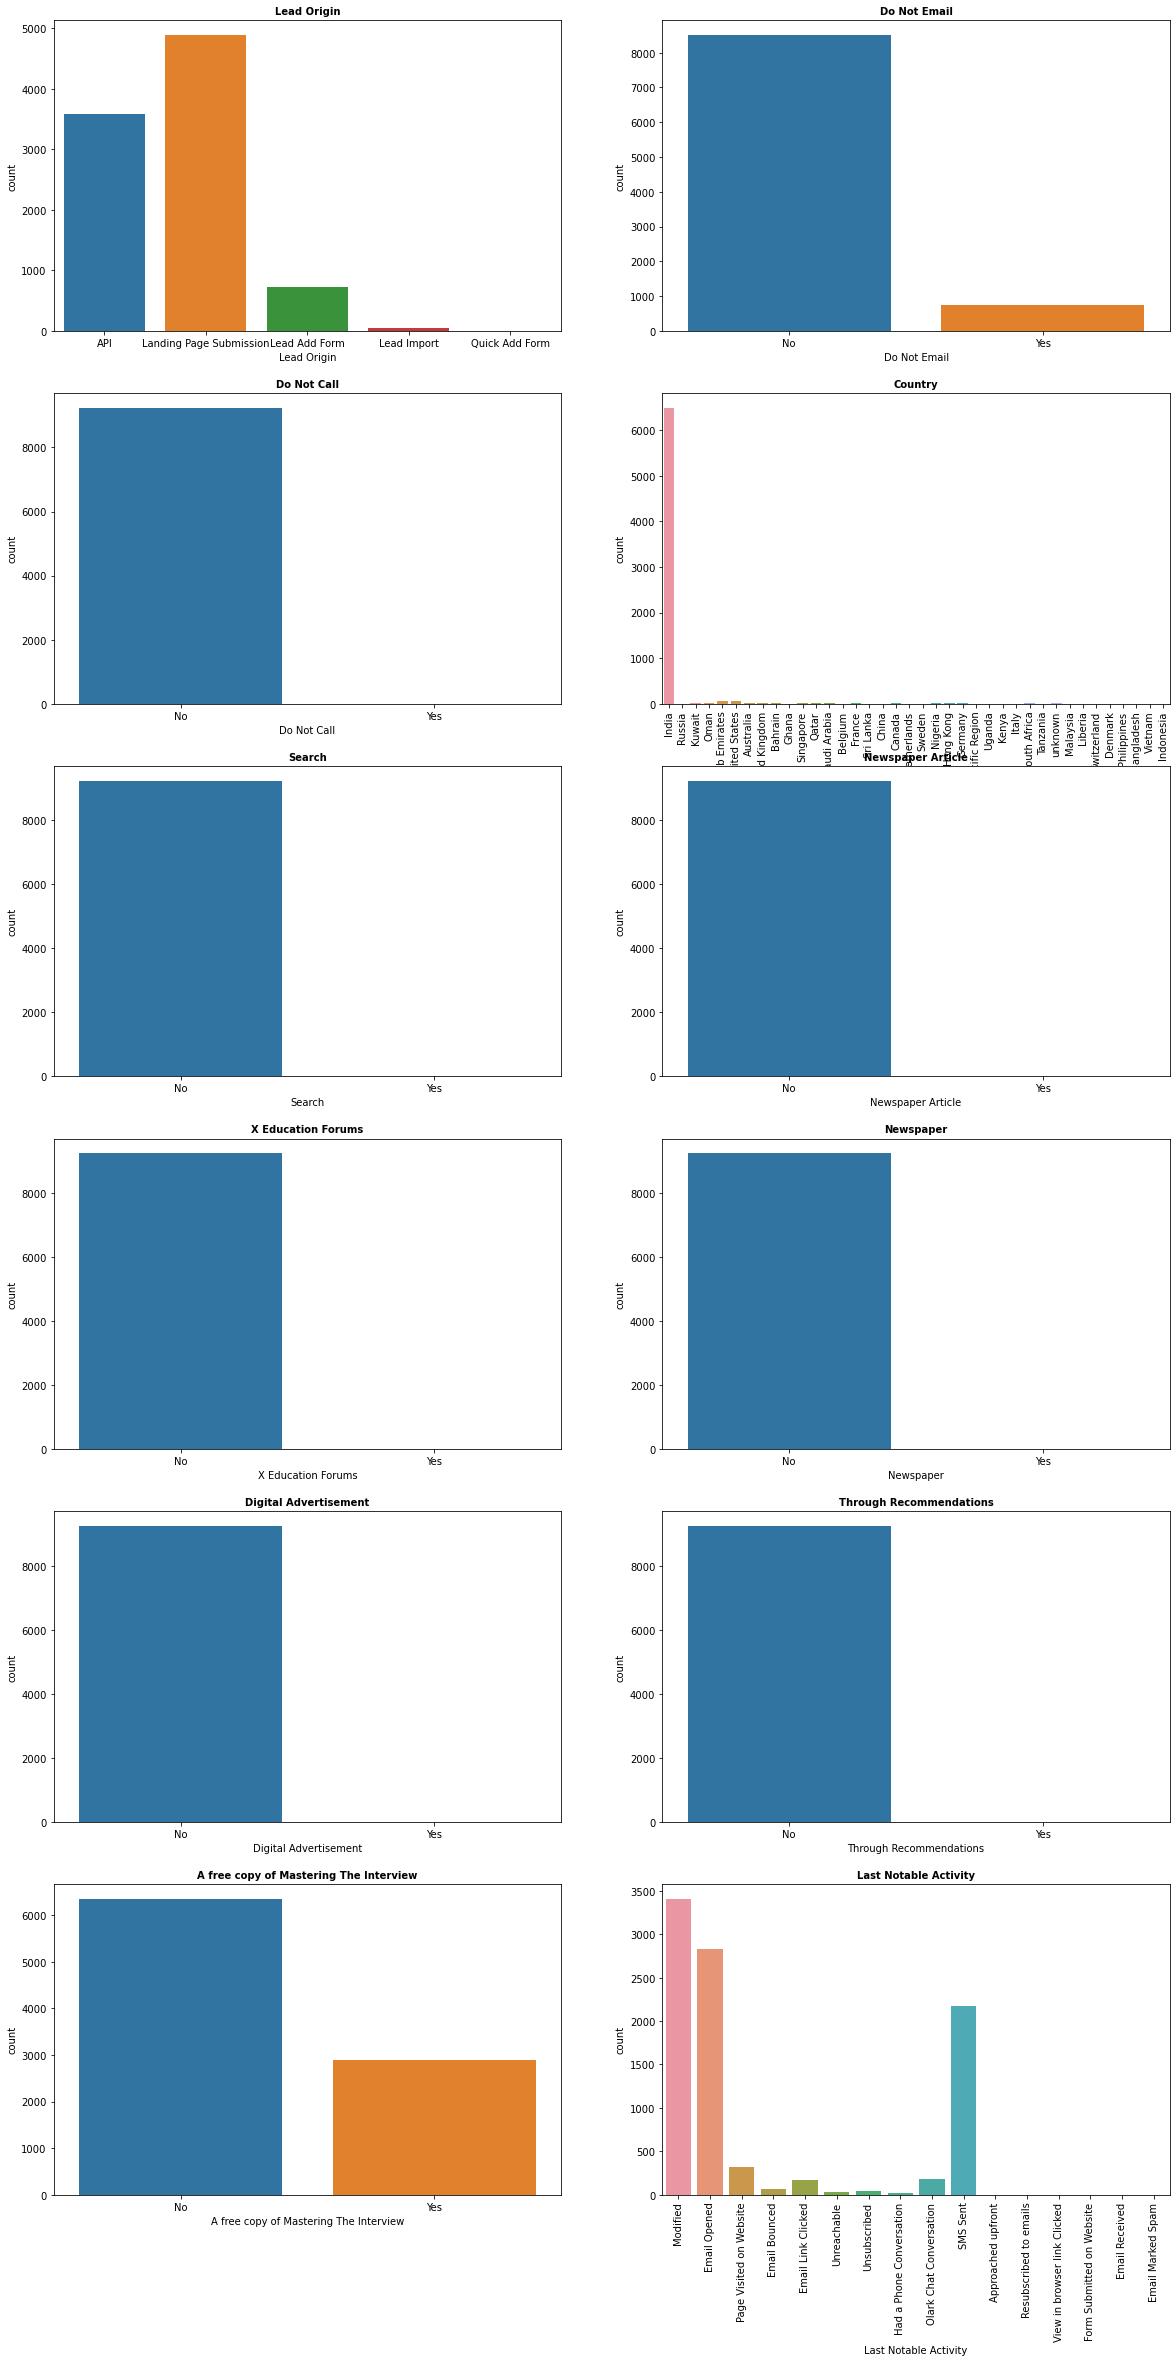

In [83]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(lead_df['Lead Origin'])
plt.title('Lead Origin', fontsize = 10, fontweight = 'bold')

plt.subplot(6,2,2)
sns.countplot(lead_df['Do Not Email'])
plt.title('Do Not Email', fontsize = 10, fontweight = 'bold')

plt.subplot(6,2,3)
sns.countplot(lead_df['Do Not Call'])
plt.title('Do Not Call', fontsize = 10, fontweight = 'bold')

plt.subplot(6,2,4)
sns.countplot(lead_df['Country']).tick_params(axis='x', rotation = 90)
plt.title('Country', fontsize = 10, fontweight = 'bold')

plt.subplot(6,2,5)
sns.countplot(lead_df['Search'])
plt.title('Search', fontsize = 10, fontweight = 'bold')

plt.subplot(6,2,6)
sns.countplot(lead_df['Newspaper Article'])
plt.title('Newspaper Article', fontsize = 10, fontweight = 'bold')

plt.subplot(6,2,7)
sns.countplot(lead_df['X Education Forums'])
plt.title('X Education Forums', fontsize = 10, fontweight = 'bold')

plt.subplot(6,2,8)
sns.countplot(lead_df['Newspaper'])
plt.title('Newspaper', fontsize = 10, fontweight = 'bold')

plt.subplot(6,2,9)
sns.countplot(lead_df['Digital Advertisement'])
plt.title('Digital Advertisement', fontsize = 10, fontweight = 'bold')

plt.subplot(6,2,10)
sns.countplot(lead_df['Through Recommendations'])
plt.title('Through Recommendations', fontsize = 10, fontweight = 'bold')

plt.subplot(6,2,11)
sns.countplot(lead_df['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview', fontsize = 10, fontweight = 'bold')

plt.subplot(6,2,12)
sns.countplot(lead_df['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity', fontsize = 10, fontweight = 'bold')


plt.show()

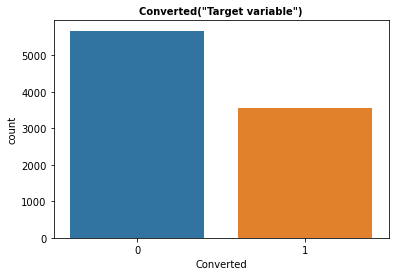

In [84]:
sns.countplot(lead_df['Converted'])
plt.title('Converted("Target variable")', fontsize = 10, fontweight = 'bold')
plt.show()

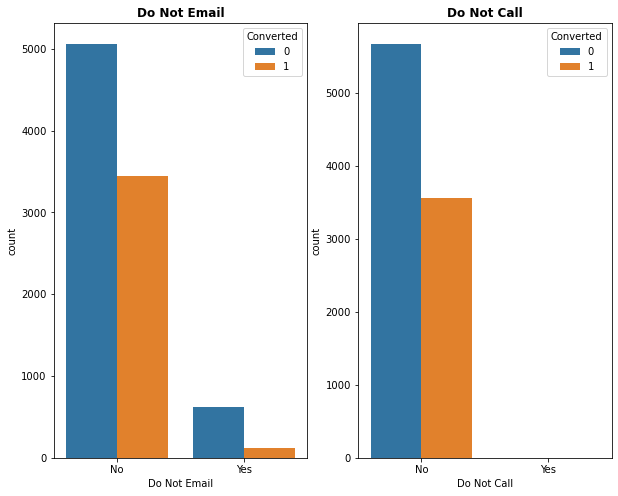

In [85]:
plt.figure(figsize = (10,8))

plt.subplot(1,2,1)
sns.countplot(x = 'Do Not Email', hue = 'Converted', data = lead_df)
plt.title('Do Not Email', fontsize = 12, fontweight = 'bold')

plt.subplot(1,2,2)
sns.countplot(x = 'Do Not Call', hue = 'Converted', data = lead_df)
plt.title('Do Not Call', fontsize = 12, fontweight = 'bold')
plt.show()

##### 2.1.2 Numerical Variables

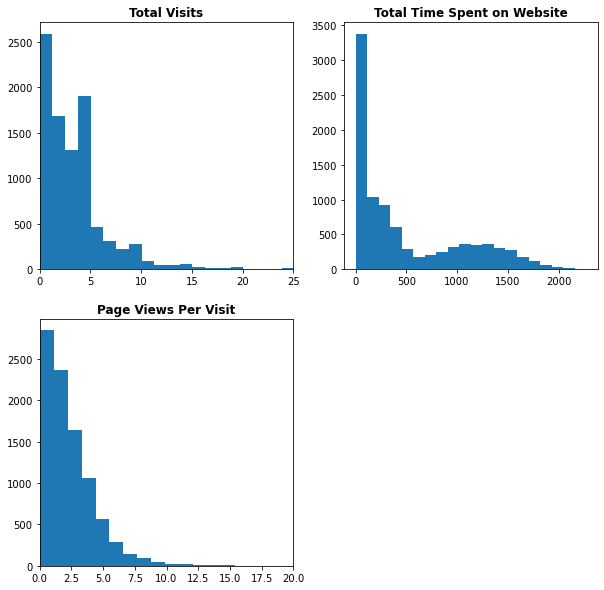

In [86]:
plt.figure(figsize = (10,10))
plt.subplot(2, 2, 1)
plt.hist(lead_df['TotalVisits'], bins = 200)
plt.title('Total Visits', fontsize = 12, fontweight = 'bold')
plt.xlim(0, 25)

plt.subplot(2, 2, 2)
plt.hist(lead_df['Total Time Spent on Website'], bins = 20)
plt.title('Total Time Spent on Website', fontsize = 12, fontweight = 'bold')

plt.subplot(2, 2, 3)
plt.hist(lead_df['Page Views Per Visit'], bins = 50)
plt.title('Page Views Per Visit', fontsize = 12, fontweight = 'bold')
plt.xlim(0, 20)
plt.show()

##### 2.2 Checking the correlation amongst variables with the help of heatmap

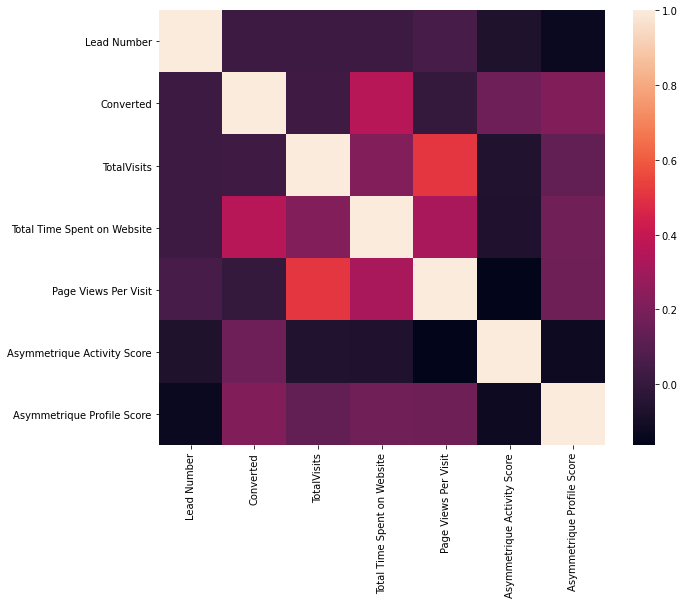

In [87]:
plt.figure(figsize=(10,8))
sns.heatmap(lead_df.corr())
plt.show()

In [88]:
# As per the heatmap, the variables are highly correlated to each other and we would need to clean the data so that
# we can build a logistic regression model

##### 2.3 Visualizing Outliers

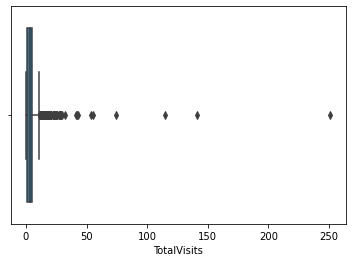

In [89]:
sns.boxplot(lead_df['TotalVisits'])
plt.show()

In [90]:
# Let us do further mathematical analysis of outliers in this case:

# Calculating Quartile 1 for the values in the column 'TotalVisits' in the raw data frame 'lead_df':
Q1 = lead_df['TotalVisits'].quantile(0.25)

# Calculating Quartile 3 for the values in the column 'TotalVisits' in the raw data frame 'lead_df':
Q3 = lead_df['TotalVisits'].quantile(0.75)

# Calculating the Interquaritle range (IQR) for the values in the column 'TotalVisits' in the raw data frame 'lead_df':
IQR = Q3 - Q1
extreme_outliers_below_Q1 = Q1 - (3 * IQR)
print("Value before which, the data points might be termed as 'Extreme Outliers' is :", extreme_outliers_below_Q1)
extreme_outliers_above_Q3 = Q3 + (3 * IQR)
print("Value after which, the data points might be termed as 'Extreme Outliers' is :", extreme_outliers_above_Q3)

Value before which, the data points might be termed as 'Extreme Outliers' is : -11.0
Value after which, the data points might be termed as 'Extreme Outliers' is : 17.0


In [91]:
# As per the describe performed in the 'Reading and Understanding Data' section:
# The min value in this column: 0
# The max value in this column: 251
# Thus, the mathematical analysis also confirms that there are outliers in this column 'TotalVisits' (beyond Q4)

In [92]:
# We should drop the values that lie beyond the extreme outlier value (17) and then plot again:

# Creating a Pandas Series 'Outlier_an' and assigning the values less than or equal to 17 from the 'TotalVisits' column from
# the data frame 'lead_df':
Outlier_an = (lead_df['TotalVisits'] <= 17)

# Applying the Pandas series 'Outlier_an' on the column 'TotalVisits' in data frame 'lead_df' to get the final values less than
# or equal to 17:
Outlier_analysis = lead_df['TotalVisits'][Outlier_an]

# Applying the value_counts function on the Pandas Series 'Outlier_analysis':
Outlier_analysis.value_counts()

0.0     2189
2.0     1680
3.0     1306
4.0     1120
5.0      783
6.0      466
1.0      395
7.0      309
8.0      224
9.0      164
10.0     114
11.0      86
13.0      48
12.0      45
14.0      36
16.0      21
15.0      18
17.0      16
Name: TotalVisits, dtype: int64

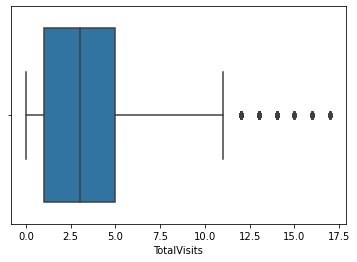

In [93]:
# Plotting a new boxplot with the extreme outlier values gone:
# (Box Plot of number of Total Visits with extreme outlier values removed):
sns.boxplot(Outlier_analysis)
plt.show()

In [94]:
# 'Total Time Spent on Website'

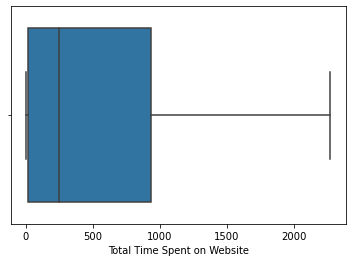

In [95]:
sns.boxplot(lead_df['Total Time Spent on Website'])
plt.show()

In [96]:
# As per the boxplot, there aren't any outliers in this column 'Total Time Spent on Website'

In [97]:
# Let us do further mathematical analysis of outliers in this case:

# Calculating Quartile 1 for the values in the column 'Total Time Spent on Website' in the raw data frame 'lead_df':
Q1 = lead_df['Total Time Spent on Website'].quantile(0.25)

# Calculating Quartile 3 for the values in the column 'Total Time Spent on Website' in the raw data frame 'lead_df':
Q3 = lead_df['Total Time Spent on Website'].quantile(0.75)

# Calculating the Interquaritle range (IQR) for the values in the column 'Total Time Spent on Website' in the raw data frame
# 'lead_df':
IQR = Q3 - Q1
extreme_outliers_below_Q1 = Q1 - (3 * IQR)
print("Value before which, the data points might be termed as 'Extreme Outliers' is:", extreme_outliers_below_Q1)
extreme_outliers_above_Q3 = Q3 + (3 * IQR)
print("Value after which, the data points might be termed as 'Extreme Outliers' is:", extreme_outliers_above_Q3)

Value before which, the data points might be termed as 'Extreme Outliers' is: -2760.0
Value after which, the data points might be termed as 'Extreme Outliers' is: 3708.0


In [98]:
# As per the describe performed in the 'Reading and Understanding Data' section:
# The min value in this column: 0
# The max value in this column: 2,272
# Thus, the mathematical analysis also confirms that there are no outliers in this column 'Total Time Spent on Website'

In [99]:
# Page Views Per Visit

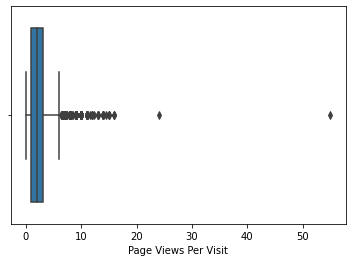

In [100]:
sns.boxplot(lead_df['Page Views Per Visit'])
plt.show()

In [101]:
# Let us do further mathematical analysis of outliers in this case:

# Calculating Quartile 1 for the values in the column 'Page Views Per Visit' in the raw data frame 'lead_df':
Q1 = lead_df['Page Views Per Visit'].quantile(0.25)

# Calculating Quartile 3 for the values in the column 'Page Views Per Visit' in the raw data frame 'lead_df':
Q3 = lead_df['Page Views Per Visit'].quantile(0.75)

# Calculating the Interquaritle range (IQR) for the values in the column 'Page Views Per Visit' in the raw data frame
# 'lead_df':
IQR = Q3 - Q1
extreme_outliers_below_Q1 = Q1 - (3 * IQR)
print("Value before which, the data points might be termed as 'Extreme Outliers' is:", extreme_outliers_below_Q1)
extreme_outliers_above_Q3 = Q3 + (3 * IQR)
print("Value after which, the data points might be termed as 'Extreme Outliers' is:", extreme_outliers_above_Q3)

Value before which, the data points might be termed as 'Extreme Outliers' is: -5.0
Value after which, the data points might be termed as 'Extreme Outliers' is: 9.0


In [102]:
# As per the describe performed in the 'Reading and Understanding Data' section:
# The min value in this column: 0
# The max value in this column: 55
# Thus, the mathematical analysis also confirms that there are outliers in this column 'Page Views Per Visit'

In [103]:
# We should drop the values that lie beyond the extreme outlier value (9) and then plot again:

# Creating a Pandas Series 'Outlier_an' and assigning the values less than or equal to 9 from the 'Page Views Per Visit' column
# from the data frame 'lead_df':
Outlier_an = (lead_df['Page Views Per Visit'] <= 9)

# Applying the Pandas series 'Outlier_an' on the column 'Page Views Per Visit' in data frame 'lead_df' to get the final values
# less than or equal to 9:
Outlier_analysis = lead_df['Page Views Per Visit'][Outlier_an]

# Applying the value_counts function on the Pandas Series 'Outlier_analysis':
Outlier_analysis.value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.38       1
8.50       1
1.31       1
3.43       1
1.64       1
Name: Page Views Per Visit, Length: 102, dtype: int64

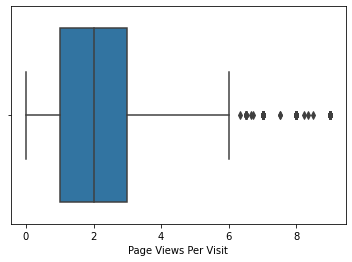

In [104]:
# Plotting a new boxplot with the extreme outlier values gone:
# (Box Plot of number of 'page views per visit' with extreme outlier values removed):
sns.boxplot(Outlier_analysis)
plt.show()

## Step 3: Data Cleaning

In [105]:
# Checking the duplicates
sum(lead_df.duplicated(subset = 'Lead Number')) == 0

True

In [106]:
# Thus, there are no duplicates in the 'Lead Number' column

In [107]:
# Converting 'Select' values to NaN.
# (We need to do this as the prospective candidate might not have filled the value in that particular question on the form due
# to some reason)
lead_df = lead_df.replace('Select', np.nan)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [108]:
# Checking the missing/ null value percentage:

missing_value_percentage_col = (lead_df.isnull().sum(axis = 0)*100)/len(lead_df)
missing_value_percentage_col

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [109]:
missing_data_columns = missing_value_percentage_col[missing_value_percentage_col>=40]
missing_data_columns.sort_values(ascending = False)

How did you hear about X Education    78.463203
Lead Profile                          74.188312
Lead Quality                          51.590909
Asymmetrique Profile Score            45.649351
Asymmetrique Activity Score           45.649351
Asymmetrique Profile Index            45.649351
Asymmetrique Activity Index           45.649351
dtype: float64

In [110]:
data_df = lead_df.drop(columns = missing_data_columns.index)

# Displaying the top 5 rows of the newly created data frame "app_data":
data_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [111]:
data_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [112]:
# Dropping unnecessary columns:
# Lead Number --> Not required in the analysis
# Remaining columns have just 1 unique value, which won't add any value to our analysis

data_df = data_df.drop(['Lead Number', 'Magazine', 'Receive More Updates About Our Courses',
                        'Update me on Supply Chain Content', 'Get updates on DM Content',
                        'I agree to pay the amount through cheque'], axis = 1)
data_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,No,No,No,No,Interested in other courses,NaN,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,No,No,No,No,Ringing,NaN,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


In [113]:
data_df.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [114]:
# We would also be dropping columns that are generated by the sales team:

data_df = data_df.drop(['Tags', 'Last Activity', 'Last Notable Activity'], axis = 1)

In [115]:
data_df.shape

(9240, 21)

In [116]:
data_df.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Country',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'City',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [117]:
# Dropping the columns having skewed numbers
data_df = data_df.drop(['Do Not Call', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement',
                        'Through Recommendations'], axis = 1)
data_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,City,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,0,0.0,0,0.0,NaN,NaN,Unemployed,Better Career Prospects,No,NaN,No
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,0,5.0,674,2.5,India,NaN,Unemployed,Better Career Prospects,No,NaN,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,India,Business Administration,Student,Better Career Prospects,No,Mumbai,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,India,Media and Advertising,Unemployed,Better Career Prospects,No,Mumbai,No
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,1,2.0,1428,1.0,India,NaN,Unemployed,Better Career Prospects,No,Mumbai,No


In [118]:
data_df.shape

(9240, 15)

In [119]:
data_df.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'City',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [120]:
# Checking the null values again:
data_df.isnull().sum()

Prospect ID                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
City                                             3669
A free copy of Mastering The Interview              0
dtype: int64

In [121]:
# Checking the percentage of null values in each column:
round(100*(data_df.isnull().sum()/len(data_df.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
City                                             39.71
A free copy of Mastering The Interview            0.00
dtype: float64

In [122]:
# We would need to individually check the columns and treat the null values

In [123]:
# Lead Source

In [124]:
data_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
WeLearn                 1
testone                 1
blog                    1
youtubechannel          1
NC_EDM                  1
Pay per Click Ads       1
welearnblog_Home        1
Name: Lead Source, dtype: int64

In [125]:
data_df['Lead Source'].isnull().sum()

36

In [126]:
# Since the highest number of counts belong to 'Google', we would be imputing the null values with 'Google':
data_df['Lead Source'] = data_df['Lead Source'].replace(np.nan, 'Google')
data_df['Lead Source'].isnull().sum()

0

In [127]:
# TotalVisits

In [128]:
data_df['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [129]:
data_df['TotalVisits'].isnull().sum()

137

In [130]:
# As we observed in the "Data Visualization" section, 'TotalVisits' column has many extreme outliers. We would be
# removing the outliers on the extremities and then imputing the null values with median

In [131]:
data_df.shape

(9240, 15)

In [132]:
data_df['TotalVisits'].shape

(9240,)

In [133]:
data_df['TotalVisits'].describe(percentiles=[.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [134]:
# Let us do further mathematical analysis of outliers in this case:

# Calculating Quartile 1 for the values in the column 'TotalVisits' in the raw data frame 'lead_df':
lower_bound = data_df['TotalVisits'].quantile(0.05)
print("lower_bound =", lower_bound)

# Calculating Quartile 3 for the values in the column 'TotalVisits' in the raw data frame 'lead_df':
upper_bound = data_df['TotalVisits'].quantile(0.95)
print("upper_bound =", upper_bound)

lower_bound = 0.0
upper_bound = 10.0


In [135]:
# Limiting the values in the 'TotalVisits' column between the quantiles 0.05 and 0.95:
# lead_df['TotalVisits'] = lead_df['TotalVisits'][lead_df['TotalVisits'].gt(lower_bound) &
# lead_df['TotalVisits'].lt(upper_bound)]

data_df['TotalVisits'] = data_df['TotalVisits'][data_df['TotalVisits'].between(lower_bound, upper_bound)]
data_df['TotalVisits'].head()

0    0.0
1    5.0
2    2.0
3    1.0
4    2.0
Name: TotalVisits, dtype: float64

In [136]:
# Checking the values of 'TotalVisits' after the values at the extremeties have been shelved off:
data_df['TotalVisits'].describe(percentiles=[.25, .5, .75, .90, .95, .99])

count    8750.000000
mean        2.906857
std         2.469730
min         0.000000
25%         0.000000
50%         3.000000
75%         4.000000
90%         6.000000
95%         8.000000
99%        10.000000
max        10.000000
Name: TotalVisits, dtype: float64

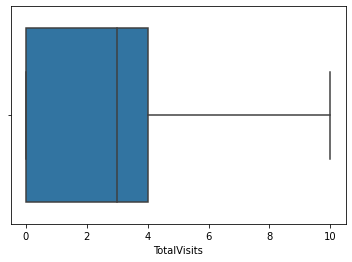

In [137]:
# Plotting a new boxplot with the extreme outlier values gone:
# (Box Plot of number of Total Visits with the outliers in the extremeties removed):
sns.boxplot(data_df['TotalVisits'])
plt.show()

In [138]:
data_df.shape

(9240, 15)

In [139]:
data_df['TotalVisits'].shape

(9240,)

In [140]:
# Thus, we can see that even after eliminating the outliers at the extremeties, the shape of the data frame 'data_df'
# is not changed.

In [141]:
# Now, we would be imputing the null values with median in the column 'TotalVisits'

In [142]:
data_df['TotalVisits'].isnull().sum()

490

In [143]:
data_df['TotalVisits'].median()

3.0

In [144]:
data_df['TotalVisits'] = data_df['TotalVisits'].replace(np.NaN, data_df['TotalVisits'].median())

In [145]:
data_df['TotalVisits'].isnull().sum()

0

In [146]:
# Page Views Per Visit 

In [147]:
data_df['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
1.27       1
8.21       1
2.14       1
2.63       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [148]:
data_df['Page Views Per Visit'].isnull().sum()

137

In [149]:
data_df['Page Views Per Visit'].describe(percentiles=[.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [150]:
# We can see that there is a dramatic jump between the values at 99 percentile and the max value. Thus, we would be 
# imputing the null values in this column 'Page Views Per Visit' with median values after removing outliers at the extremeties

In [151]:
# Let us do further mathematical analysis of outliers in this case:

# Calculating Quartile 1 for the values in the column 'Page Views Per Visit' in the raw data frame 'data_df':
lower_bound = data_df['Page Views Per Visit'].quantile(0.05)
print("lower_bound =", lower_bound)

# Calculating Quartile 3 for the values in the column 'Page Views Per Visit' in the raw data frame 'data_df':
upper_bound = data_df['Page Views Per Visit'].quantile(0.95)
print("upper_bound =", upper_bound)

lower_bound = 0.0
upper_bound = 6.0


In [152]:
# Limiting the values in the 'Page Views Per Visit' column between the quantiles 0.05 and 0.95:

data_df['Page Views Per Visit'] = data_df['Page Views Per Visit'][data_df['Page Views Per Visit'].between(lower_bound,
                                                                                                          upper_bound)]
data_df['Page Views Per Visit'].head()

0    0.0
1    2.5
2    2.0
3    1.0
4    1.0
Name: Page Views Per Visit, dtype: float64

In [153]:
# Checking the values of 'Page Views Per Visit' after the values at the extremeties have been shelved off:
data_df['Page Views Per Visit'].describe(percentiles=[.25, .5, .75, .90, .95, .99])

count    8743.000000
mean        2.104903
std         1.656934
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
90%         4.000000
95%         5.000000
99%         6.000000
max         6.000000
Name: Page Views Per Visit, dtype: float64

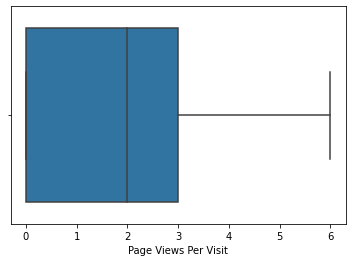

In [154]:
# Plotting a new boxplot with the extreme outlier values gone:
# (Box Plot of number of Total Visits with the outliers in the extremeties removed):
sns.boxplot(data_df['Page Views Per Visit'])
plt.show()

In [155]:
data_df['Page Views Per Visit'].shape

(9240,)

In [156]:
# Thus, we can see that eliminating the outliers at the extremeties does not reduce the number of rows in this column
# 'Page Views Per Visit'

In [157]:
# Now, we would be imputing the null values in the column 'Page Views Per Visit' with the median

In [158]:
data_df['Page Views Per Visit'].isnull().sum()

497

In [159]:
data_df['Page Views Per Visit'].median()

2.0

In [160]:
data_df['Page Views Per Visit'] = data_df['Page Views Per Visit'].replace(np.NaN, data_df['Page Views Per Visit'].median())

In [161]:
data_df['Page Views Per Visit'].isnull().sum()

0

In [162]:
# Country

In [163]:
data_df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
South Africa               4
Nigeria                    4
Kuwait                     4
Canada                     4
Germany                    4
Sweden                     3
Netherlands                2
Philippines                2
Italy                      2
Asia/Pacific Region        2
Bangladesh                 2
Belgium                    2
Ghana                      2
China                      2
Uganda                     2
Vietnam                    1
Russia                     1
Switzerland                1
Sri Lanka                  1
Denmark                    1
Liberia                    1
Malaysia      

In [164]:
data_df['Country'].value_counts(normalize = True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Bahrain                 0.001033
Hong Kong               0.001033
France                  0.000885
Oman                    0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Germany                 0.000590
Sweden                  0.000443
Netherlands             0.000295
Philippines             0.000295
Italy                   0.000295
Asia/Pacific Region     0.000295
Bangladesh              0.000295
Belgium                 0.000295
Ghana                   0.000295
China                   0.000295
Uganda                  0.000295
Vietnam                 0.000148
Russia                  0.000148
Switzerlan

In [165]:
# Since the overwhelming majority belongs to 'India', we can club the rest of the prospective students from 'Other Countries'

In [166]:
data_df['Country'] = data_df['Country'].apply(lambda x: 'India' if x =='India' else 'Other Countries')
data_df['Country'].value_counts()

India              6492
Other Countries    2748
Name: Country, dtype: int64

In [167]:
# Checking the null values:

data_df['Country'].isnull().sum()

0

In [168]:
# Specialization

In [169]:
data_df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [170]:
data_df['Specialization'].value_counts().sum()

5860

In [171]:
data_df['Specialization'].isnull().sum()

3380

In [172]:
data_df['Specialization'] = data_df['Specialization'].replace(np.nan, 'Unknown')
data_df['Specialization'].value_counts()

Unknown                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [173]:
# What is your current occupation

In [174]:
data_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [175]:
data_df['What is your current occupation'].isnull().sum()

2690

In [176]:
data_df['What is your current occupation'] = data_df['What is your current occupation'].fillna('Unknown')
data_df['What is your current occupation'].value_counts()

Unemployed              5600
Unknown                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [177]:
data_df['What is your current occupation'].isnull().sum()

0

In [178]:
data_df['What is your current occupation'] = data_df['What is your current occupation'].replace(['Unemployed', 'Student',
                                             'Housewife'], 'Unemployed')
data_df['What is your current occupation'] = data_df['What is your current occupation'].replace(['Unknown', 'Other'], 'Unknown')
data_df['What is your current occupation'] = data_df['What is your current occupation'].replace(['Working Professional',
                                             'Businessman'], 'Working')
data_df['What is your current occupation'].value_counts()

Unemployed    5820
Unknown       2706
Working        714
Name: What is your current occupation, dtype: int64

In [179]:
# What matters most to you in choosing a course

In [180]:
data_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [181]:
data_df['What matters most to you in choosing a course'].value_counts(normalize = True)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

In [182]:
data_df['What matters most to you in choosing a course'].isnull().sum()

2709

In [183]:
# We would be dropping this column as majority of the values are either 'Better Career Prospects' or null:

data_df = data_df.drop('What matters most to you in choosing a course', axis = 1)
data_df.shape

(9240, 14)

In [184]:
# City

In [185]:
data_df['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [186]:
data_df['City'].isnull().sum()

3669

In [187]:
data_df['City'] = data_df['City'].fillna("Unknown")
data_df['City'].isnull().sum()

0

In [188]:
data_df['City'].value_counts()

Unknown                        3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [189]:
# We would be dropping this column as it does not appear to add any value in our analysis

data_df = data_df.drop('City', axis = 1)

In [190]:
# Country

In [191]:
data_df['Country'] = data_df['Country'].map({'India': 1, "Other Countries": 0})
data_df['Country'].value_counts()

1    6492
0    2748
Name: Country, dtype: int64

In [192]:
# re-checking for the percentage of null values in each column 

round((data_df.isnull().sum(axis = 0)/ len(data_df.index))*100 , 2)

Prospect ID                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Country                                   0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
A free copy of Mastering The Interview    0.0
dtype: float64

In [193]:
data_df.shape

(9240, 13)

In [194]:
# Removing all rows with null values

data_df = data_df.dropna(axis = 0)
data_df.shape

(9240, 13)

In [195]:
# Now that the data set has been cleaned and there are no null values in columns and rows, we can proceed to the 
# 'Data Preparation' section

## Step 4: Data Preparation

In [196]:
# Checking the first 5 rows of the data frame 'data_df':

data_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,Search,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,0,0.0,0,0.0,0,Unknown,Unemployed,No,No
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,0,5.0,674,2.5,1,Unknown,Unemployed,No,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,1,Business Administration,Unemployed,No,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,1,Media and Advertising,Unemployed,No,No
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,1,2.0,1428,1.0,1,Unknown,Unemployed,No,No


In [197]:
# List of variables to map

varlist =  ['Do Not Email', 'Search', 'A free copy of Mastering The Interview']


# Defining the map function

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})


# Applying the function to the housing list

data_df[varlist] = lead_df[varlist].apply(binary_map)

In [198]:
data_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,Search,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,0,Unknown,Unemployed,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,1,Unknown,Unemployed,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,1,Business Administration,Unemployed,0,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,1,Media and Advertising,Unemployed,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,1,Unknown,Unemployed,0,0


In [199]:
# We would need to reduce the number of values in the column 'Lead Source':

data_df['Lead Source'] = data_df['Lead Source'].replace(['Olark Chat', 'blog', 'Click2call', 'Live Chat', 'NC_EDM',
                                                         'Pay per Click Ads', 'Press_Release', 'Reference', 'Referral Sites',
                                                         'testone', 'WeLearn', 'welearnblog_Home', 'Welingak Website',
                                                         'youtubechannel', 'Facebook', 'Social Media'], 'Others')
data_df['Lead Source'] = data_df['Lead Source'].replace(['bing', 'Google', 'Organic Search', 'google'], 'Search')

# We would leave 'Direct Traffic' as it is

# Performing the value_counts() on the column 'Lead Source':
data_df['Lead Source'].value_counts()

Search            4069
Others            2628
Direct Traffic    2543
Name: Lead Source, dtype: int64

In [200]:
# Lead Origin

In [201]:
data_df['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [202]:
# Since the last 3 values in the 'Lead Origin' column are not big in quantity, we would club them in 'Others' category:

data_df['Lead Origin'] = data_df['Lead Origin'].replace(['Lead Add Form', 'Lead Import', 'Quick Add Form'], 'Others')
data_df['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Others                      774
Name: Lead Origin, dtype: int64

In [203]:
# Specialization

In [204]:
data_df['Specialization'].value_counts()

Unknown                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [205]:
# We would not be aggregating the values in this column 'Specialization'

In [206]:
# What is your current occupation

In [207]:
data_df['What is your current occupation'].value_counts()

Unemployed    5820
Unknown       2706
Working        714
Name: What is your current occupation, dtype: int64

In [208]:
# Now we would go ahead and create dummy variables for the requisite columns

In [209]:
dummy1 = pd.get_dummies(data_df[['Lead Origin', 'Lead Source', 'Specialization', 'What is your current occupation']],
                        drop_first = True)

# Adding the results to the master dataframe
data_df = pd.concat([data_df, dummy1], axis=1)

In [210]:
data_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,...,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Unknown,What is your current occupation_Working
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Others,0,0,0.0,0,0.0,0,Unknown,...,0,0,0,0,0,0,0,1,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Search,0,0,5.0,674,2.5,1,Unknown,...,0,0,0,0,0,0,0,1,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,1,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,1,Media and Advertising,...,1,0,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Search,0,1,2.0,1428,1.0,1,Unknown,...,0,0,0,0,0,0,0,1,0,0


In [211]:
# Dropping the repeated variables

In [212]:
data_df = data_df.drop(['Lead Origin', 'Lead Source', 'Specialization', 'What is your current occupation'], axis = 1)

In [213]:
data_df.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Search,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,...,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Unknown,What is your current occupation_Working
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [214]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Do Not Email                              9240 non-null   int64  
 2   Converted                                 9240 non-null   int64  
 3   TotalVisits                               9240 non-null   float64
 4   Total Time Spent on Website               9240 non-null   int64  
 5   Page Views Per Visit                      9240 non-null   float64
 6   Country                                   9240 non-null   int64  
 7   Search                                    9240 non-null   int64  
 8   A free copy of Mastering The Interview    9240 non-null   int64  
 9   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 10  Lead Origin_Others                  

In [215]:
# This would be our final data frame that we would be using for the test-train split. Let us do the outlier check and
# the null value check to confirm

In [216]:
data_df[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].describe(percentiles=[.25,.5,.75,.90,.95,.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,2.911797,487.698268,2.099261
std,2.403436,548.021466,1.611926
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,4.000000,936.000000,3.000000
90%,6.000000,1380.000000,4.000000
95%,8.000000,1562.000000,5.000000
99%,10.000000,1840.610000,6.000000


In [217]:
# Looking at the missing values in the data frame 'data_df'

data_df.isnull().sum()

Prospect ID                                 0
Do Not Email                                0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Country                                     0
Search                                      0
A free copy of Mastering The Interview      0
Lead Origin_Landing Page Submission         0
Lead Origin_Others                          0
Lead Source_Others                          0
Lead Source_Search                          0
Specialization_Business Administration      0
Specialization_E-Business                   0
Specialization_E-COMMERCE                   0
Specialization_Finance Management           0
Specialization_Healthcare Management        0
Specialization_Hospitality Management       0
Specialization_Human Resource Management    0
Specialization_IT Projects Management       0
Specialization_International Busin

In [218]:
data_df.shape

(9240, 33)

In [219]:
# Thus there appear to be no outliers and no missing values. We can now safely proceed with the test-train split.

## Step 5: Splitting the Data into Training and Testing Sets

In [220]:
# Importing the relevant library
from sklearn.model_selection import train_test_split

In [221]:
# Putting feature variable to X
X = data_df.drop(['Prospect ID', 'Converted'], axis = 1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Search,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Others,...,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Unknown,What is your current occupation_Working
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,5.0,674,2.5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,2.0,1532,2.0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [222]:
y = data_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [223]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

## Step 6: Feature Scaling

In [224]:
# Importing the relevant library:
from sklearn.preprocessing import StandardScaler

In [225]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Search,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Others,...,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Unknown,What is your current occupation_Working
1871,0,-1.212996,-0.885371,-1.302259,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6795,0,0.461906,0.005716,-0.474404,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3516,0,0.880631,-0.691418,0.253859,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8105,0,0.880631,1.365219,1.809977,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3934,0,-1.212996,-0.885371,-1.302259,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [226]:
### Checking the Conversion Rate
converted = (sum(data_df['Converted'])/len(data_df['Converted'].index))*100
converted

38.53896103896104

## Step 7: Looking at Correlations

In [227]:
%matplotlib inline

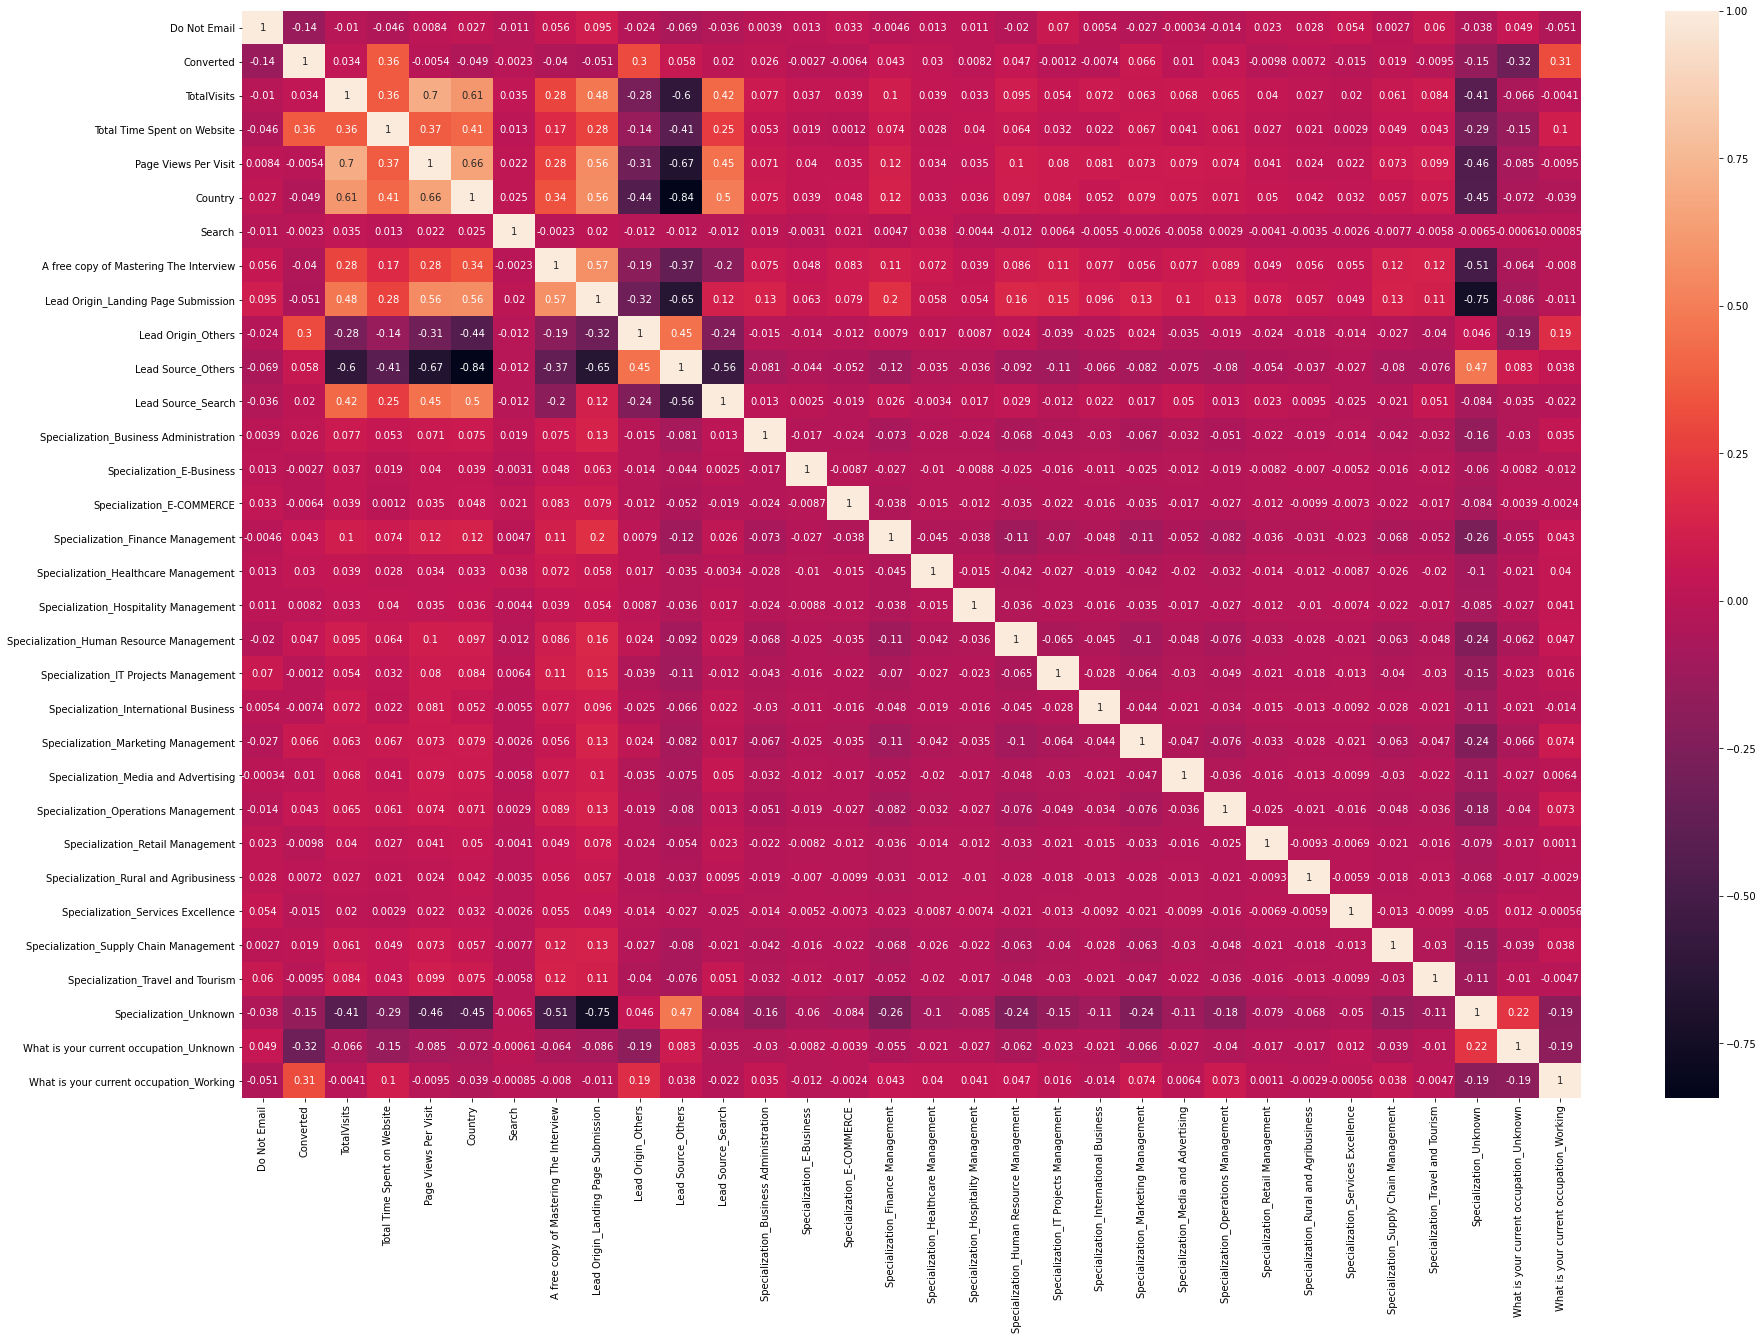

In [228]:
# Let's see the correlation matrix 
plt.figure(figsize = (30, 20))        # Size of the figure
sns.heatmap(data_df.corr(), annot = True)
plt.show()

In [229]:
# "Page Views Per Visit" and "Lead Source_Others" appear to be highly correlated but we are not dropping these columns for now

## Step 8: Model Building

##### Running Our First Training Model

In [230]:
# Importing the relevant library
import statsmodels.api as sm

In [231]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6436
Model Family:                Binomial   Df Model:                           31
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2897.9
Date:                Mon, 17 May 2021   Deviance:                       5795.8
Time:                        23:21:40   Pearson chi2:                 7.55e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.5673      0.262      2.162      0.031       0.053       1.082
Do Not Email                                -1.2052      0.156     -7.750      0.000      -1.510      -0.900
TotalVisits                                  0.1376      0.047      2.907      0.004       0.045       0.230
Total Time Spent on Website                  1.0721      0.039     27.737      0.000       0.996       1.148
Page Views Per Visit                        -0.1651      0.052     -3.160      0.002      -0.267      -0.063
Country                                     -0.4818      0.137     -3.514      0.000      -0.750      -0.213
Search                                       0.1378      0.762      0.181      0.857      -1.356       1.632
A free copy of Mastering The Interview      -0.2129      0.096     -2.206      0.027      -0.402      -0.024
Lead Origin_Landing Page Submission         -0.6903      0.130     -5.312      0.000      -0.945      -0.436
Lead Origin_Others                           2.2119      0.159     13.888      0.000       1.900       2.524
Lead Source_Others                           0.5504      0.166      3.323      0.001       0.226       0.875
Lead Source_Search                           0.2668      0.100      2.680      0.007       0.072       0.462
Specialization_Business Administration      -0.3140      0.235     -1.339      0.181      -0.774       0.146
Specialization_E-Business                   -0.2434      0.456     -0.533      0.594      -1.138       0.651
Specialization_E-COMMERCE                    0.1239      0.327      0.379      0.705      -0.516       0.764
Specialization_Finance Management           -0.0652      0.200     -0.327      0.744      -0.456       0.326
Specialization_Healthcare Management         0.0387      0.317      0.122      0.903      -0.583       0.661
Specialization_Hospitality Management       -1.2047      0.359     -3.354      0.001      -1.909      -0.501
Specialization_Human Resource Management    -0.2868      0.202     -1.417      0.156      -0.683       0.110
Specialization_IT Projects Management       -0.0215      0.240     -0.090      0.929      -0.491       0.448
Specialization_International Business       -0.5905      0.303     -1.951      0.051      -1.184       0.003
Specialization_Marketing Management         -0.2847      0.203     -1.401      0.161      -0.683       0.114
Specialization_Media and Advertising        -0.0472      0.276     -0.171      0.864      -0.588       0.494
Specialization_Operations Management        -0.2149      0.221     -0.974      0.330      -0.648       0.218
Specialization_Retail Management            -0.5920      0.363     -1.632      0.103      -1.303       0.119
Specialization_Rural and Agribu

## Step 9: Feature Selection Using RFE

In [232]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

##### Coarse Tuning with the help of RFE

In [233]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 35)             # running RFE with all 35 variables as output
rfe = rfe.fit(X_train, y_train)

In [234]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [235]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Country', True, 1),
 ('Search', True, 1),
 ('A free copy of Mastering The Interview', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Others', True, 1),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Search', True, 1),
 ('Specialization_Business Administration', True, 1),
 ('Specialization_E-Business', True, 1),
 ('Specialization_E-COMMERCE', True, 1),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Healthcare Management', True, 1),
 ('Specialization_Hospitality Management', True, 1),
 ('Specialization_Human Resource Management', True, 1),
 ('Specialization_IT Projects Management', True, 1),
 ('Specialization_International Business', True, 1),
 ('Specialization_Marketing Management', True, 1),
 ('Specialization_Media and Advertising', True, 1),
 ('Specialization_Operations Management', True, 1),
 ('Spec

In [236]:
col = X_train.columns[rfe.support_]

In [237]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

In [238]:
# We observe that RFE is not eliminating any column. Thus, we would be manually reducing the number of features to 15
# and perform RFE again

### Model 1

In [239]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [240]:
rfe.support_

array([ True, False,  True, False,  True, False, False,  True,  True,
        True,  True, False, False,  True, False, False,  True, False,
       False,  True, False, False, False,  True,  True, False, False,
       False,  True,  True,  True])

In [241]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 10),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 9),
 ('Country', True, 1),
 ('Search', False, 14),
 ('A free copy of Mastering The Interview', False, 2),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Others', True, 1),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Search', True, 1),
 ('Specialization_Business Administration', False, 3),
 ('Specialization_E-Business', False, 7),
 ('Specialization_E-COMMERCE', True, 1),
 ('Specialization_Finance Management', False, 17),
 ('Specialization_Healthcare Management', False, 13),
 ('Specialization_Hospitality Management', True, 1),
 ('Specialization_Human Resource Management', False, 6),
 ('Specialization_IT Projects Management', False, 15),
 ('Specialization_International Business', True, 1),
 ('Specialization_Marketing Management', False, 5),
 ('Specialization_Media and Advertising', False, 16),
 ('Specialization_Operations Management',

In [242]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Country',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Others',
       'Lead Source_Others', 'Lead Source_Search', 'Specialization_E-COMMERCE',
       'Specialization_Hospitality Management',
       'Specialization_International Business',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness', 'Specialization_Unknown',
       'What is your current occupation_Unknown',
       'What is your current occupation_Working'],
      dtype='object')

In [243]:
col.value_counts().sum()

15

In [244]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Search',
       'A free copy of Mastering The Interview',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism'],
      dtype='object')

##### Checking and preparing the data frame required for assessing the model with Statsmodel

In [245]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Search,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Others,...,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Unknown,What is your current occupation_Working
1871,0,-1.212996,-0.885371,-1.302259,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6795,0,0.461906,0.005716,-0.474404,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3516,0,0.880631,-0.691418,0.253859,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8105,0,0.880631,1.365219,1.809977,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3934,0,-1.212996,-0.885371,-1.302259,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [246]:
X_train.shape

(6468, 31)

In [247]:
X_train[col].head()

,Do Not Email,Total Time Spent on Website,Country,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Others,Lead Source_Search,Specialization_E-COMMERCE,Specialization_Hospitality Management,Specialization_International Business,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Unknown,What is your current occupation_Unknown,What is your current occupation_Working
1871,0,-0.885371,0,0,0,1,0,0,0,0,0,0,0,0,0
6795,0,0.005716,1,1,0,0,0,0,0,0,0,0,1,0,0
3516,0,-0.691418,0,0,0,1,0,0,0,0,0,0,1,0,0
8105,0,1.365219,1,1,0,0,1,0,0,0,0,0,0,0,0
3934,0,-0.885371,0,0,0,1,0,0,0,0,0,0,1,0,0


In [248]:
X_train[col].shape

(6468, 15)

In [249]:
X_train_rfe_model_1 = sm.add_constant(X_train[col])
X_train_rfe_model_1.head()

,const,Do Not Email,Total Time Spent on Website,Country,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Others,Lead Source_Search,Specialization_E-COMMERCE,Specialization_Hospitality Management,Specialization_International Business,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Unknown,What is your current occupation_Unknown,What is your current occupation_Working
1871,1.0,0,-0.885371,0,0,0,1,0,0,0,0,0,0,0,0,0
6795,1.0,0,0.005716,1,1,0,0,0,0,0,0,0,0,1,0,0
3516,1.0,0,-0.691418,0,0,0,1,0,0,0,0,0,0,1,0,0
8105,1.0,0,1.365219,1,1,0,0,1,0,0,0,0,0,0,0,0
3934,1.0,0,-0.885371,0,0,0,1,0,0,0,0,0,0,1,0,0


In [250]:
X_train_rfe_model_1.shape

(6468, 16)

##### Assessing the model with StatsModels

In [251]:
# Here, we use the GLM (Generalized Linear Models) method of the library statsmodels. 'Binomial()' in the 'family' argument
# tells statsmodels that it needs to fit a logit curve to a binomial data (i.e. in which the target will have just two classes,
# here 'Converted' and 'Non-Converted').

In [252]:
logm1 = sm.GLM(y_train, X_train_rfe_model_1, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2909.9
Date:                Mon, 17 May 2021   Deviance:                       5819.8
Time:                        23:21:41   Pearson chi2:                 7.64e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.2509      0.191      1.312      0.190      -0.124       0.626
Do Not Email                               -1.1972      0.154     -7.765      0.000      -1.499      -0.895
Total Time Spent on Website                 1.0639      0.038     27.817      0.000       0.989       1.139
Country                                    -0.4820      0.133     -3.611      0.000      -0.744      -0.220
Lead Origin_Landing Page Submission        -0.7381      0.127     -5.819      0.000      -0.987      -0.489
Lead Origin_Others                          2.2284      0.159     14.025      0.000       1.917       2.540
Lead Source_Others                          0.6638      0.159      4.180      0.000       0.353       0.975
Lead Source_Search                          0.3543      0.086      4.123      0.000       0.186       0.523
Specialization_E-COMMERCE                   0.3040      0.280      1.087      0.277      -0.244       0.852
Specialization_Hospitality Management      -1.0347      0.317     -3.263      0.001      -1.656      -0.413
Specialization_International Business      -0.4263      0.252     -1.690      0.091      -0.921       0.068
Specialization_Retail Management           -0.4025      0.318     -1.266      0.206      -1.026       0.221
Specialization_Rural and Agribusiness       0.3913      0.372      1.051      0.293      -0.338       1.121
Specialization_Unknown                     -0.9522      0.117     -8.126      0.000      -1.182      -0.723
What is your current occupation_Unknown    -1.1990      0.083    -14.482      0.000      -1.361      -1.037
What is your current occupation_Working     2.3129      0.179     12.932      0.000       1.962       2.663
===========================================================================================================
"""

In [253]:
# We can see that the p-value is greater than 0.05 for 4 variables. Highest amongst them is that of "Specialization_Rural and
# Agribusiness". Thus, we would be dropping this and then rebuild the model. We would do this in the "Manual Feature
# Elimination" section.

In [254]:
# Creating a new data frame 'X' and assigning the value to it by dropping the constant from the data frame 'X_train_rfe_model_1'
X = X_train_rfe_model_1.drop(['const'], axis = 1)

In [255]:
# Checking the column names of the data frame 'X':
X.columns

Index(['Do Not Email', 'Total Time Spent on Website', 'Country',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Others',
       'Lead Source_Others', 'Lead Source_Search', 'Specialization_E-COMMERCE',
       'Specialization_Hospitality Management',
       'Specialization_International Business',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness', 'Specialization_Unknown',
       'What is your current occupation_Unknown',
       'What is your current occupation_Working'],
      dtype='object')

In [256]:
# Checking the shape of the data frame 'X':
X.shape

(6468, 15)

In [257]:
# Now that we have a fixed set of 15 variables, we would be switching to the manual feature elimimation (Backward elimination)

##### Manual Feature Elimination

In [258]:
# Creating, preparing and inspecting a new data frame "X_train_model_2" for assessing the 2nd model with StatsModels

In [259]:
# Dropping the variable 'Specialization_Rural and Agribusiness' (as its p-value was 0.293 at the end of model 1):
X_train_model_2 = X.drop('Specialization_Rural and Agribusiness', axis = 1)
X_train_model_2.head()

,Do Not Email,Total Time Spent on Website,Country,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Others,Lead Source_Search,Specialization_E-COMMERCE,Specialization_Hospitality Management,Specialization_International Business,Specialization_Retail Management,Specialization_Unknown,What is your current occupation_Unknown,What is your current occupation_Working
1871,0,-0.885371,0,0,0,1,0,0,0,0,0,0,0,0
6795,0,0.005716,1,1,0,0,0,0,0,0,0,1,0,0
3516,0,-0.691418,0,0,0,1,0,0,0,0,0,1,0,0
8105,0,1.365219,1,1,0,0,1,0,0,0,0,0,0,0
3934,0,-0.885371,0,0,0,1,0,0,0,0,0,1,0,0


In [260]:
X_train_model_2.shape

(6468, 14)

In [261]:
X_train_model_2.columns

Index(['Do Not Email', 'Total Time Spent on Website', 'Country',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Others',
       'Lead Source_Others', 'Lead Source_Search', 'Specialization_E-COMMERCE',
       'Specialization_Hospitality Management',
       'Specialization_International Business',
       'Specialization_Retail Management', 'Specialization_Unknown',
       'What is your current occupation_Unknown',
       'What is your current occupation_Working'],
      dtype='object')

### Model 2

In [262]:
# Adding a constant variable to the data frame 'X_train_model_2':
X_train_rfe_model_2 = sm.add_constant(X_train_model_2)

In [263]:
# Viewing the top 5 rows of the new data frame 'X_train_rfe_model_2':
X_train_rfe_model_2.head()

,const,Do Not Email,Total Time Spent on Website,Country,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Others,Lead Source_Search,Specialization_E-COMMERCE,Specialization_Hospitality Management,Specialization_International Business,Specialization_Retail Management,Specialization_Unknown,What is your current occupation_Unknown,What is your current occupation_Working
1871,1.0,0,-0.885371,0,0,0,1,0,0,0,0,0,0,0,0
6795,1.0,0,0.005716,1,1,0,0,0,0,0,0,0,1,0,0
3516,1.0,0,-0.691418,0,0,0,1,0,0,0,0,0,1,0,0
8105,1.0,0,1.365219,1,1,0,0,1,0,0,0,0,0,0,0
3934,1.0,0,-0.885371,0,0,0,1,0,0,0,0,0,1,0,0


In [264]:
# Checking the shape of the data frame 'X_train_rfe_model_2' again (after the addition of the constant):
X_train_rfe_model_2.shape

(6468, 15)

In [265]:
# Assessing the model with Statsmodel:

logm2 = sm.GLM(y_train, X_train_rfe_model_2, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2910.5
Date:                Mon, 17 May 2021   Deviance:                       5820.9
Time:                        23:21:41   Pearson chi2:                 7.64e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.2540      0.191      1.328      0.184      -0.121       0.629
Do Not Email                               -1.1940      0.154     -7.746      0.000      -1.496      -0.892
Total Time Spent on Website                 1.0635      0.038     27.816      0.000       0.989       1.138
Country                                    -0.4810      0.133     -3.604      0.000      -0.743      -0.219
Lead Origin_Landing Page Submission        -0.7375      0.127     -5.815      0.000      -0.986      -0.489
Lead Origin_Others                          2.2267      0.159     14.017      0.000       1.915       2.538
Lead Source_Others                          0.6673      0.159      4.202      0.000       0.356       0.979
Lead Source_Search                          0.3556      0.086      4.139      0.000       0.187       0.524
Specialization_E-COMMERCE                   0.2989      0.280      1.069      0.285      -0.249       0.847
Specialization_Hospitality Management      -1.0397      0.317     -3.280      0.001      -1.661      -0.418
Specialization_International Business      -0.4315      0.252     -1.711      0.087      -0.926       0.063
Specialization_Retail Management           -0.4076      0.318     -1.282      0.200      -1.031       0.216
Specialization_Unknown                     -0.9579      0.117     -8.184      0.000      -1.187      -0.728
What is your current occupation_Unknown    -1.2003      0.083    -14.501      0.000      -1.363      -1.038
What is your current occupation_Working     2.3109      0.179     12.925      0.000       1.960       2.661
===========================================================================================================
"""

In [266]:
# We can observe that there are 3 features having p-value more than 0.05. The highest value amongst them belongs to
# 'Specialization_E-COMMERCE' --> 0.285. Thus, we would be eliminating it and re-assess the model using statsmodel

In [267]:
# Updating the data frame 'X' by dropping the constant from the data frame 'X_train_rfe_model_2':
X = X_train_rfe_model_2.drop(['const'], axis = 1)

In [268]:
X.columns

Index(['Do Not Email', 'Total Time Spent on Website', 'Country',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Others',
       'Lead Source_Others', 'Lead Source_Search', 'Specialization_E-COMMERCE',
       'Specialization_Hospitality Management',
       'Specialization_International Business',
       'Specialization_Retail Management', 'Specialization_Unknown',
       'What is your current occupation_Unknown',
       'What is your current occupation_Working'],
      dtype='object')

In [269]:
X.shape

(6468, 14)

In [270]:
# Dropping the variable 'Specialization_E-COMMERCE' (as its p-value was 0.285 at the end of model 2):
X_train_model_3 = X.drop('Specialization_E-COMMERCE', axis = 1)
X_train_model_3.head()

,Do Not Email,Total Time Spent on Website,Country,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Others,Lead Source_Search,Specialization_Hospitality Management,Specialization_International Business,Specialization_Retail Management,Specialization_Unknown,What is your current occupation_Unknown,What is your current occupation_Working
1871,0,-0.885371,0,0,0,1,0,0,0,0,0,0,0
6795,0,0.005716,1,1,0,0,0,0,0,0,1,0,0
3516,0,-0.691418,0,0,0,1,0,0,0,0,1,0,0
8105,0,1.365219,1,1,0,0,1,0,0,0,0,0,0
3934,0,-0.885371,0,0,0,1,0,0,0,0,1,0,0


In [271]:
X_train_model_3.shape

(6468, 13)

In [272]:
X_train_model_3.columns

Index(['Do Not Email', 'Total Time Spent on Website', 'Country',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Others',
       'Lead Source_Others', 'Lead Source_Search',
       'Specialization_Hospitality Management',
       'Specialization_International Business',
       'Specialization_Retail Management', 'Specialization_Unknown',
       'What is your current occupation_Unknown',
       'What is your current occupation_Working'],
      dtype='object')

### Model 3

In [273]:
# Adding a constant variable to the data frame 'X_train_model_3':
X_train_rfe_model_3 = sm.add_constant(X_train_model_3)

In [274]:
# Viewing the top 5 rows of the data frame 'X_train_rfe_model_3':
X_train_rfe_model_3.head()

,const,Do Not Email,Total Time Spent on Website,Country,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Others,Lead Source_Search,Specialization_Hospitality Management,Specialization_International Business,Specialization_Retail Management,Specialization_Unknown,What is your current occupation_Unknown,What is your current occupation_Working
1871,1.0,0,-0.885371,0,0,0,1,0,0,0,0,0,0,0
6795,1.0,0,0.005716,1,1,0,0,0,0,0,0,1,0,0
3516,1.0,0,-0.691418,0,0,0,1,0,0,0,0,1,0,0
8105,1.0,0,1.365219,1,1,0,0,1,0,0,0,0,0,0
3934,1.0,0,-0.885371,0,0,0,1,0,0,0,0,1,0,0


In [275]:
# Checking the shape of the data frame 'X_train_rfe_model_3' again (after the addition of the constant):
X_train_rfe_model_3.shape

(6468, 14)

In [276]:
# Assessing the model with Statsmodel:

logm3 = sm.GLM(y_train, X_train_rfe_model_3, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2911.0
Date:                Mon, 17 May 2021   Deviance:                       5822.0
Time:                        23:21:42   Pearson chi2:                 7.65e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.2609      0.191      1.366      0.172      -0.113       0.635
Do Not Email                               -1.1922      0.154     -7.738      0.000      -1.494      -0.890
Total Time Spent on Website                 1.0618      0.038     27.812      0.000       0.987       1.137
Country                                    -0.4793      0.133     -3.594      0.000      -0.741      -0.218
Lead Origin_Landing Page Submission        -0.7363      0.127     -5.808      0.000      -0.985      -0.488
Lead Origin_Others                          2.2259      0.159     14.012      0.000       1.915       2.537
Lead Source_Others                          0.6629      0.159      4.176      0.000       0.352       0.974
Lead Source_Search                          0.3517      0.086      4.099      0.000       0.184       0.520
Specialization_Hospitality Management      -1.0451      0.317     -3.299      0.001      -1.666      -0.424
Specialization_International Business      -0.4380      0.252     -1.738      0.082      -0.932       0.056
Specialization_Retail Management           -0.4140      0.318     -1.303      0.193      -1.037       0.209
Specialization_Unknown                     -0.9622      0.117     -8.228      0.000      -1.191      -0.733
What is your current occupation_Unknown    -1.1997      0.083    -14.495      0.000      -1.362      -1.037
What is your current occupation_Working     2.3119      0.179     12.925      0.000       1.961       2.663
===========================================================================================================
"""

In [277]:
# We can observe that there are 2 features having p-value more than 0.05. The highest value amongst them belongs to
# 'Specialization_Retail Management' --> 0.193. Thus, we would be eliminating it and re-assess the model using statsmodel

In [278]:
# Updating the data frame 'X' by dropping the constant from the data frame 'X_train_rfe_model_3':
X = X_train_rfe_model_3.drop(['const'], axis = 1)

In [279]:
X.columns

Index(['Do Not Email', 'Total Time Spent on Website', 'Country',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Others',
       'Lead Source_Others', 'Lead Source_Search',
       'Specialization_Hospitality Management',
       'Specialization_International Business',
       'Specialization_Retail Management', 'Specialization_Unknown',
       'What is your current occupation_Unknown',
       'What is your current occupation_Working'],
      dtype='object')

In [280]:
X.shape

(6468, 13)

In [281]:
# Dropping the variable 'Specialization_Retail Management' (as its p-value was 0.193 at the end of model 3):
X_train_model_4 = X.drop('Specialization_Retail Management', axis = 1)
X_train_model_4.head()

,Do Not Email,Total Time Spent on Website,Country,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Others,Lead Source_Search,Specialization_Hospitality Management,Specialization_International Business,Specialization_Unknown,What is your current occupation_Unknown,What is your current occupation_Working
1871,0,-0.885371,0,0,0,1,0,0,0,0,0,0
6795,0,0.005716,1,1,0,0,0,0,0,1,0,0
3516,0,-0.691418,0,0,0,1,0,0,0,1,0,0
8105,0,1.365219,1,1,0,0,1,0,0,0,0,0
3934,0,-0.885371,0,0,0,1,0,0,0,1,0,0


In [282]:
# Checking the shape of the data frame 'X_train_model_4' again (after the addition of the constant):
X_train_model_4.shape

(6468, 12)

In [283]:
X_train_model_4.columns

Index(['Do Not Email', 'Total Time Spent on Website', 'Country',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Others',
       'Lead Source_Others', 'Lead Source_Search',
       'Specialization_Hospitality Management',
       'Specialization_International Business', 'Specialization_Unknown',
       'What is your current occupation_Unknown',
       'What is your current occupation_Working'],
      dtype='object')

### Model 4

In [284]:
# Adding a constant variable to the data frame 'X_train_model_4':
X_train_rfe_model_4 = sm.add_constant(X_train_model_4)

In [285]:
# Viewing the top 5 rows of the data frame 'X_train_rfe_model_4':
X_train_rfe_model_4.head()

,const,Do Not Email,Total Time Spent on Website,Country,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Others,Lead Source_Search,Specialization_Hospitality Management,Specialization_International Business,Specialization_Unknown,What is your current occupation_Unknown,What is your current occupation_Working
1871,1.0,0,-0.885371,0,0,0,1,0,0,0,0,0,0
6795,1.0,0,0.005716,1,1,0,0,0,0,0,1,0,0
3516,1.0,0,-0.691418,0,0,0,1,0,0,0,1,0,0
8105,1.0,0,1.365219,1,1,0,0,1,0,0,0,0,0
3934,1.0,0,-0.885371,0,0,0,1,0,0,0,1,0,0


In [286]:
# Checking the shape of the data frame 'X_train_rfe_model_4' again (after the addition of the constant):
X_train_rfe_model_4.shape

(6468, 13)

In [287]:
# Assessing the model with Statsmodel:

logm4 = sm.GLM(y_train, X_train_rfe_model_4, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2911.9
Date:                Mon, 17 May 2021   Deviance:                       5823.8
Time:                        23:21:42   Pearson chi2:                 7.67e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.2581      0.191      1.351      0.177      -0.116       0.632
Do Not Email                               -1.1951      0.154     -7.757      0.000      -1.497      -0.893
Total Time Spent on Website                 1.0606      0.038     27.802      0.000       0.986       1.135
Country                                    -0.4797      0.133     -3.597      0.000      -0.741      -0.218
Lead Origin_Landing Page Submission        -0.7396      0.127     -5.836      0.000      -0.988      -0.491
Lead Origin_Others                          2.2266      0.159     14.017      0.000       1.915       2.538
Lead Source_Others                          0.6596      0.159      4.157      0.000       0.349       0.971
Lead Source_Search                          0.3505      0.086      4.086      0.000       0.182       0.519
Specialization_Hospitality Management      -1.0370      0.317     -3.274      0.001      -1.658      -0.416
Specialization_International Business      -0.4305      0.252     -1.709      0.087      -0.924       0.063
Specialization_Unknown                     -0.9572      0.117     -8.190      0.000      -1.186      -0.728
What is your current occupation_Unknown    -1.1990      0.083    -14.486      0.000      -1.361      -1.037
What is your current occupation_Working     2.3099      0.179     12.917      0.000       1.959       2.660
===========================================================================================================
"""

In [288]:
# We can observe that there is 1 feature having p-value more than 0.05:
# 'Specialization_International Business' --> 0.087. Thus, we would be eliminating it and re-assess the model using statsmodel

In [289]:
# Updating the data frame 'X' by dropping the constant from the data frame 'X_train_rfe_model_4':
X = X_train_rfe_model_4.drop(['const'], axis = 1)

In [290]:
X.columns

Index(['Do Not Email', 'Total Time Spent on Website', 'Country',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Others',
       'Lead Source_Others', 'Lead Source_Search',
       'Specialization_Hospitality Management',
       'Specialization_International Business', 'Specialization_Unknown',
       'What is your current occupation_Unknown',
       'What is your current occupation_Working'],
      dtype='object')

In [291]:
X.shape

(6468, 12)

In [292]:
# Dropping the variable 'Specialization_International Business' (as its p-value was 0.087 at the end of model 4):
X_train_model_5 = X.drop('Specialization_International Business', axis = 1)
X_train_model_5.head()

,Do Not Email,Total Time Spent on Website,Country,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Others,Lead Source_Search,Specialization_Hospitality Management,Specialization_Unknown,What is your current occupation_Unknown,What is your current occupation_Working
1871,0,-0.885371,0,0,0,1,0,0,0,0,0
6795,0,0.005716,1,1,0,0,0,0,1,0,0
3516,0,-0.691418,0,0,0,1,0,0,1,0,0
8105,0,1.365219,1,1,0,0,1,0,0,0,0
3934,0,-0.885371,0,0,0,1,0,0,1,0,0


In [293]:
# Checking the shape of the data frame 'X_train_model_5' again (after the addition of the constant):
X_train_model_5.shape

(6468, 11)

In [294]:
X_train_model_5.columns

Index(['Do Not Email', 'Total Time Spent on Website', 'Country',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Others',
       'Lead Source_Others', 'Lead Source_Search',
       'Specialization_Hospitality Management', 'Specialization_Unknown',
       'What is your current occupation_Unknown',
       'What is your current occupation_Working'],
      dtype='object')

### Model 5

In [295]:
# Adding a constant variable to the data frame 'X_train_model_5':
X_train_rfe_model_5 = sm.add_constant(X_train_model_5)

In [296]:
# Viewing the top 5 rows of the new data frame 'X_train_rfe_model_5':
X_train_rfe_model_5.head()

,const,Do Not Email,Total Time Spent on Website,Country,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Others,Lead Source_Search,Specialization_Hospitality Management,Specialization_Unknown,What is your current occupation_Unknown,What is your current occupation_Working
1871,1.0,0,-0.885371,0,0,0,1,0,0,0,0,0
6795,1.0,0,0.005716,1,1,0,0,0,0,1,0,0
3516,1.0,0,-0.691418,0,0,0,1,0,0,1,0,0
8105,1.0,0,1.365219,1,1,0,0,1,0,0,0,0
3934,1.0,0,-0.885371,0,0,0,1,0,0,1,0,0


In [297]:
# Checking the shape of the data frame 'X_train_rfe_model_5' again (after the addition of the constant):
X_train_rfe_model_5.shape

(6468, 12)

In [298]:
# Assessing the model with Statsmodel:

logm5 = sm.GLM(y_train, X_train_rfe_model_5, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2913.4
Date:                Mon, 17 May 2021   Deviance:                       5826.8
Time:                        23:21:42   Pearson chi2:                 7.65e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.2410      0.191      1.265      0.206      -0.132       0.615
Do Not Email                               -1.1951      0.154     -7.749      0.000      -1.497      -0.893
Total Time Spent on Website                 1.0614      0.038     27.825      0.000       0.987       1.136
Country                                    -0.4757      0.133     -3.569      0.000      -0.737      -0.214
Lead Origin_Landing Page Submission        -0.7382      0.127     -5.828      0.000      -0.986      -0.490
Lead Origin_Others                          2.2289      0.159     14.036      0.000       1.918       2.540
Lead Source_Others                          0.6625      0.159      4.178      0.000       0.352       0.973
Lead Source_Search                          0.3480      0.086      4.060      0.000       0.180       0.516
Specialization_Hospitality Management      -1.0250      0.317     -3.236      0.001      -1.646      -0.404
Specialization_Unknown                     -0.9427      0.117     -8.092      0.000      -1.171      -0.714
What is your current occupation_Unknown    -1.1987      0.083    -14.483      0.000      -1.361      -1.037
What is your current occupation_Working     2.3153      0.179     12.953      0.000       1.965       2.666
===========================================================================================================
"""

In [299]:
# Now that the p-values of the variables in model 5 are below 0.05, we would now calculate the VIF to check for the
# multicollinearity

In [300]:
# Updating the data frame 'X' by dropping the constant from the data frame 'X_train_rfe_model_5':
X = X_train_rfe_model_5.drop(['const'], axis = 1)

In [301]:
X.columns

Index(['Do Not Email', 'Total Time Spent on Website', 'Country',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Others',
       'Lead Source_Others', 'Lead Source_Search',
       'Specialization_Hospitality Management', 'Specialization_Unknown',
       'What is your current occupation_Unknown',
       'What is your current occupation_Working'],
      dtype='object')

In [302]:
X.shape

(6468, 11)

In [303]:
# Importing the relevant libraries for the calculation of VIF:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [304]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Country,6.56
3,Lead Origin_Landing Page Submission,4.25
8,Specialization_Unknown,3.20
5,Lead Source_Others,3.09
6,Lead Source_Search,2.76
9,What is your current occupation_Unknown,1.60
4,Lead Origin_Others,1.53
1,Total Time Spent on Website,1.26
10,What is your current occupation_Working,1.20
0,Do Not Email,1.11


In [305]:
# We can observe that the VIF for the variable 'Country' is greater than 5 --> "6.56"
# Thus, we would need to remove this variable

In [306]:
# Dropping the variable 'Country' (as its VIF is 6.56 at the end of model 5):
X_train_model_6 = X.drop('Country', axis = 1)
X_train_model_6.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Others,Lead Source_Search,Specialization_Hospitality Management,Specialization_Unknown,What is your current occupation_Unknown,What is your current occupation_Working
1871,0,-0.885371,0,0,1,0,0,0,0,0
6795,0,0.005716,1,0,0,0,0,1,0,0
3516,0,-0.691418,0,0,1,0,0,1,0,0
8105,0,1.365219,1,0,0,1,0,0,0,0
3934,0,-0.885371,0,0,1,0,0,1,0,0


In [307]:
X_train_model_6.columns

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Others',
       'Lead Source_Others', 'Lead Source_Search',
       'Specialization_Hospitality Management', 'Specialization_Unknown',
       'What is your current occupation_Unknown',
       'What is your current occupation_Working'],
      dtype='object')

In [308]:
X_train_model_6.shape

(6468, 10)

### Model 6

In [309]:
# Adding a constant variable to the data frame 'X_train_model_6':
X_train_rfe_model_6 = sm.add_constant(X_train_model_6)

In [310]:
# Viewing the top 5 rows of the new data frame 'X_train_rfe_model_6':
X_train_rfe_model_6.head()

,const,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Others,Lead Source_Search,Specialization_Hospitality Management,Specialization_Unknown,What is your current occupation_Unknown,What is your current occupation_Working
1871,1.0,0,-0.885371,0,0,1,0,0,0,0,0
6795,1.0,0,0.005716,1,0,0,0,0,1,0,0
3516,1.0,0,-0.691418,0,0,1,0,0,1,0,0
8105,1.0,0,1.365219,1,0,0,1,0,0,0,0
3934,1.0,0,-0.885371,0,0,1,0,0,1,0,0


In [311]:
# Checking the shape of the data frame 'X_train_rfe_model_6' again (after the addition of the constant):
X_train_rfe_model_6.shape

(6468, 11)

In [312]:
# Assessing the model with Statsmodel:

logm6 = sm.GLM(y_train, X_train_rfe_model_6, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2919.7
Date:                Mon, 17 May 2021   Deviance:                       5839.5
Time:                        23:21:43   Pearson chi2:                 7.57e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.2114      0.142     -1.490      0.136      -0.490       0.067
Do Not Email                               -1.1717      0.153     -7.649      0.000      -1.472      -0.871
Total Time Spent on Website                 1.0407      0.037     27.765      0.000       0.967       1.114
Lead Origin_Landing Page Submission        -0.7165      0.126     -5.692      0.000      -0.963      -0.470
Lead Origin_Others                          2.3388      0.156     14.957      0.000       2.032       2.645
Lead Source_Others                          0.9718      0.133      7.305      0.000       0.711       1.233
Lead Source_Search                          0.3163      0.085      3.728      0.000       0.150       0.483
Specialization_Hospitality Management      -1.0238      0.315     -3.249      0.001      -1.641      -0.406
Specialization_Unknown                     -0.8804      0.115     -7.664      0.000      -1.106      -0.655
What is your current occupation_Unknown    -1.1967      0.083    -14.464      0.000      -1.359      -1.035
What is your current occupation_Working     2.3237      0.178     13.051      0.000       1.975       2.673
===========================================================================================================
"""

In [313]:
# Since the p-values of all the variables in this model are below 0.05, we would go ahead with the calculation of VIF

In [314]:
X = X_train_rfe_model_6.drop(['const'], axis = 1)

In [315]:
X.columns

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Others',
       'Lead Source_Others', 'Lead Source_Search',
       'Specialization_Hospitality Management', 'Specialization_Unknown',
       'What is your current occupation_Unknown',
       'What is your current occupation_Working'],
      dtype='object')

In [316]:
X.shape

(6468, 10)

##### Calculating the VIF

In [317]:
# VIF  calculates how well one independent variable is explained by all the other independent variables combined. And its
# formula is given as:

# VIF(i) = 1/ (1 - (R(i))^2)

# where 'i' refers to the i'th variable which is being represented as a combination of rest of the independent variables.

In [318]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Source_Others,3.02
7,Specialization_Unknown,2.78
5,Lead Source_Search,2.13
2,Lead Origin_Landing Page Submission,1.83
8,What is your current occupation_Unknown,1.60
3,Lead Origin_Others,1.53
1,Total Time Spent on Website,1.23
9,What is your current occupation_Working,1.18
0,Do Not Email,1.11
6,Specialization_Hospitality Management,1.02


In [319]:
# The values of VIF of all the variables is below 5

In [320]:
# Since the p-values and VIF are within acceptable range, model 6 is our final model.

## Step 10: Creating Prediction

In [321]:
# In this case study, the logistic regression curve gives us the probabilities of 'conversion' and 'non-conversion'. We can get
# these probabilities by simply using the 'predict' function

In [322]:
# Predicting the probabilities (of the "converted" value being 1) on the train set
y_train_pred = res.predict(X_train_rfe_model_6)
y_train_pred[:10]

1871    0.459835
6795    0.141558
3516    0.301621
8105    0.691920
3934    0.260874
4844    0.965590
3297    0.202437
8071    0.994239
987     0.334873
7423    0.782323
dtype: float64

In [323]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.45983489, 0.14155805, 0.30162093, 0.69192047, 0.26087409,
       0.96558994, 0.20243684, 0.99423853, 0.33487299, 0.78232333])

In [324]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID
0,0,0.459835,1871
1,0,0.141558,6795
2,0,0.301621,3516
3,0,0.691920,8105
4,0,0.260874,3934


In [325]:
# The logistic curve gives us just the probabilities and not the actual classification of 'Conversion' and 'Non-Conversion',
# we need to find a threshold probability to classify customers as 'converted' and 'non-converted'.

# Here, we choose 0.5 as an arbitrary cutoff wherein if the probability of a particular customer converting is less than 0.5,
# you'd classify it as 'Non-Converted' and if it's greater than 0.5, you'd classify it as 'Converted'.

# The choice of 0.5 is completely arbitrary at this stage.

In [326]:
# For now, substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,Predicted
0,0,0.459835,1871,0
1,0,0.141558,6795,0
2,0,0.301621,3516,0
3,0,0.691920,8105,1
4,0,0.260874,3934,0


In [327]:
# We can see that the values in the 'Predicted' column remain '0' when the corresponding values in the 'Conversion_Prob'
# column are below 0.5. As soon as the value in the 'Conversion Prob' becomes greater than 0.5, the corresponding
# value in the 'Predicted' column becomes '1'.

## Step 11: Model Evaluation

##### Checking the accuracy with cut-off being 0.5

In [328]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [329]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3554,  448],
       [ 863, 1603]], dtype=int64)

In [330]:
# Predicted     not_converted  converted
# Actual
# not_converted     3554        448
# converted          863       1603

In [331]:
# The above can also be represented as:

# Predicted     not_converted  converted
# Actual
# not_converted      TN         FP
# converted          FN         TP

# Where, TN = True Negative --> Location: [0,0]
# FN = False Negative --> Location: [1,0]
# FP = False Positive --> Location: [0,1]
# TP = True Positive --> Location: [1,1]

In [332]:
# The simplest model evaluation metric for classification models is "Accuracy" - it is the percentage of correctly predicted
# labels. So what would the correctly predicted labels be? They would be:

# 'Converted' customers being actually identified as converted
# 'Not converted' customers being actually identified as not-converted.

# The correctly predicted labels are contained in the first row and first column (3554), and the last row and last column (1603)

In [333]:
# Accuracy = (Correctly Predicted Labels)/ (Total Number of Labels) = (3554 + 1603)/ (3554 + 448 + 863 + 1603)
# = 5157/ 6468 = 0.7973098 = 79.73% (approx.)

In [334]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7973098330241187

In [335]:
# This verifies the result of our manual calculation.

In [336]:
# But there are a few more metrics beyond 'accuracy', that are essential to evaluate the performance of a logistic regression
# model. Then based on these metrics, we'll try find out the optimal scenario where the model will perform the best.

# These metrics are:

# Accuracy
# Sensitivity, Specificity and the ROC Curve
# Precision and Recall

In [337]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [338]:
print("True Positive at cut off of 0.5; TP =", TP)
print("True Negative at cut off of 0.5; TN =", TN)
print("False Positive at cut off of 0.5; FP =", FP)
print("False Negative at cut off of 0.5; FN =", FN)

True Positive at cut off of 0.5; TP = 1603
True Negative at cut off of 0.5; TN = 3554
False Positive at cut off of 0.5; FP = 448
False Negative at cut off of 0.5; FN = 863


In [339]:
# Calculating the sensitivity
TP/(TP+FN)

0.6500405515004055

In [340]:
# Customers who actually got converted = TP/(TP + FN) = 1603/(1603 + 863) = 1603/2466 = 65% (Approx.)
# Thus, although the accuracy is 79.73%, only 65% 'converted' customers will be predicted by the model as 'converted'.
# The remaining 35% need to be factored in as well so that the sales team can prioritize them as well.

# In essence, what’s happening here is that we care more about one class (class='converted') than the other.
# On the other hand, the accuracy tells us the model's performance on both the classes combined

In [341]:
# Calculating the specificity
TN/(TN+FP)

0.888055972013993

In [342]:
# Our model seems to have high accuracy (79.73%), low sensitivity (65%) and high specificity (88.80%).
# Since we're interested in identifying the customers which might convert, we clearly need to deal with this.
# We will deal with this situation with the help of ROC Curves in the next section.

## Step 12: Plotting the ROC Curve ('Receiver Operating Characteristic' Curve)

##### The previous cut off was randomely selected. Now to find the optimum one

In [343]:
# ROC function
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs,
                                             drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize = (5, 5))
    plt.plot( fpr, tpr, label = 'ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = "lower right")
    plt.show()

    return None

In [344]:
# TPR = True Positive Rate --> Out of actually 'converted' cases, how many is the model correctly predicting as 'converted'
# FPR = False Positive Rate --> Out of actual 'non-convert' cases, how many is the model incorrectly predicting as 'converted'

# Thus we would want as high TPR as possible & as low FPR as possible. Ideal model would have TPR = 1 and FPR = 0.
# ROC Curve shows the trade-off between TPR and FPR.

In [345]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob,
                                         drop_intermediate = False)

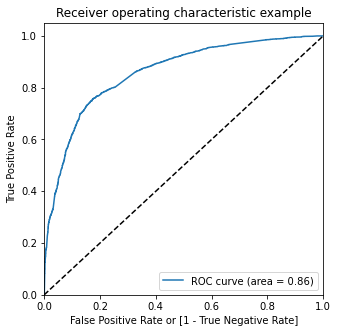

In [346]:
# We would need to give the actual Conversion values and the respective Conversion Probabilities to the curve
# Call the ROC function:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [347]:
# As we can see, for higher values of TPR, we will also have higher values of FPR, which might not be good. So it's all about
# finding a balance between these two metrics and that's what the ROC curve helps us find.

#  A good ROC curve is the one which touches the upper-left corner of the graph; so higher the area under the curve (AUC) of an
# ROC curve, the better is the model.

# The least area that an ROC curve can have is 0.5 (area below the 45 degree diagonal), and the highest area it can have is 1.
# If the ROC curve is more towards the upper-left corner of the graph, it means that the model is very good and if it is more
# towards the 45-degree diagonal, it means that the model is almost completely random. 

## Step 13: Finding Optimal Cutoff Point

##### 13.1: Sensitivity and Specificity

In [348]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.459835,1871,0,1,1,1,1,1,0,0,0,0,0
1,0,0.141558,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.301621,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.691920,8105,1,1,1,1,1,1,1,1,0,0,0
4,0,0.260874,3934,0,1,1,1,0,0,0,0,0,0,0


In [349]:
# Now let's calculate accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.583179  0.963098  0.349075
0.2   0.2  0.689703  0.909570  0.554223
0.3   0.3  0.786333  0.781833  0.789105
0.4   0.4  0.803185  0.727899  0.849575
0.5   0.5  0.797310  0.650041  0.888056
0.6   0.6  0.786797  0.581103  0.913543
0.7   0.7  0.764842  0.481752  0.939280
0.8   0.8  0.723098  0.317518  0.973013
0.9   0.9  0.683055  0.182076  0.991754


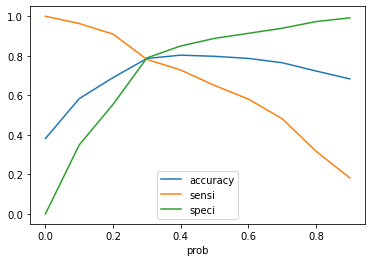

In [350]:
# Let's plot accuracy, sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [351]:
# The optimal cut-off point exists where the values of accuracy, sensitivity, and specificity are fairly decent and almost equal

In [352]:
# In this case study, we would need high sensitivity. High sensitivity implies that our model will correctly identify almost
# all customers who are likely to convert. It will do that by over-estimating the conversion likelihood, i.e. it will
# misclassify some non-converts as converted, but that is the trade-off we need to choose rather than the opposite case (in
# which case it would identify some converts as non-converts)

##### From the curve above, 0.27 appears to be the optimum point to take it as a cutoff probability

In [353]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.27 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.459835,1871,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.141558,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.301621,3516,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.691920,8105,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.260874,3934,0,1,1,1,0,0,0,0,0,0,0,0


In [354]:
y_train_pred_final['Lead_Score_Train'] = y_train_pred_final.Conversion_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score_Train
0,0,0.459835,1871,0,1,1,1,1,1,0,0,0,0,0,1,46
1,0,0.141558,6795,0,1,1,0,0,0,0,0,0,0,0,0,14
2,0,0.301621,3516,0,1,1,1,1,0,0,0,0,0,0,1,30
3,0,0.691920,8105,1,1,1,1,1,1,1,1,0,0,0,1,69
4,0,0.260874,3934,0,1,1,1,0,0,0,0,0,0,0,0,26


In [355]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7735003092145949

In [356]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion2

array([[3032,  970],
       [ 495, 1971]], dtype=int64)

In [357]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [358]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7992700729927007

In [359]:
# Let us calculate specificity
TN / float(TN+FP)

0.7576211894052973

In [360]:
# Calculate false postive rate - predicting conversion when customer has not have converted
print(FP/ float(TN+FP))

0.24237881059470265


In [361]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6701802108126488


In [362]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8596540969662603


##### 13.2.1 Precision and Recall

In [363]:
#Looking at the confusion matrix again

In [364]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion

array([[3032,  970],
       [ 495, 1971]], dtype=int64)

In [365]:
# Precision = TP/ (TP + FP)
# Probability that a predicted 'Yes' is actually a 'Yes'.

In [366]:
# Precision:
TP/ (TP + FP)

0.6701802108126488

In [367]:
# Alternately, Precision:
confusion[1,1]/(confusion[0,1] + confusion[1,1])

0.6701802108126488

In [368]:
# Recall = TP/ (TP + FN)
# Probability that an actual 'Yes' case is predicted correctly.

In [369]:
# Recall:
TP/ (TP + FN)

0.7992700729927007

In [370]:
# Alternately, Recall:
confusion[1,1]/(confusion[1,0] + confusion[1,1])

0.7992700729927007

##### 13.2.2: Using sklearn utilities for the same

In [371]:
from sklearn.metrics import precision_score, recall_score

In [372]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.6701802108126488

In [373]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7992700729927007

##### 13.2.3 Precision and recall tradeoff

In [374]:
from sklearn.metrics import precision_recall_curve

In [375]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       1
 1       0
 2       1
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: final_predicted, Length: 6468, dtype: int64)

In [376]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

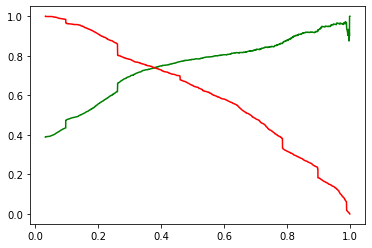

In [377]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [378]:
# As per the above graph, the cut-off value is approximately 0.38

## Step 14: Making predictions on the test set

In [379]:
# Finally, since we've chosen the optimal scenario based on the evaluation metrics, we'll finally go on and make predictions
# on the test data set and see how our model performs there as well.

In [380]:
# In this session, we will go forward with the sensitivity-specificity view of things and make predictions based on the 0.27
# cut-off that we decided earlier.

In [381]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [382]:
X_test = X_test[X.columns]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Others,Lead Source_Search,Specialization_Hospitality Management,Specialization_Unknown,What is your current occupation_Unknown,What is your current occupation_Working
4269,0,0.964504,0,0,0,0,0,1,1,0
2376,0,-0.885371,0,1,1,0,0,1,0,0
7766,0,-0.777416,0,0,0,1,0,0,0,1
9199,0,-0.885371,0,0,1,0,0,1,0,0
4359,0,-0.885371,0,1,1,0,0,0,0,0


In [383]:
X_test_sm = sm.add_constant(X_test)

In [384]:
# Commented Out Code Block
# X_test_sm= X_test_sm.drop(['Specialization_Rural and Agribusiness','Specialization_Retail Management',
#                           'Specialization_International Business','Specialization_E-COMMERCE','Country'],axis=1)

Making predictions on the test set

In [385]:
y_test_pred = res.predict(X_test_sm)

In [386]:
y_test_pred[:10]

4269    0.216730
2376    0.785393
7766    0.834728
9199    0.260874
4359    0.898238
9186    0.409109
1631    0.597705
8963    0.233866
8007    0.111587
5324    0.226475
dtype: float64

In [387]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [388]:
# Let's see the head
y_pred_1.head()

,0
4269,0.216730
2376,0.785393
7766,0.834728
9199,0.260874
4359,0.898238


In [389]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [390]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [391]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [392]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [393]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.216730
1,1,2376,0.785393
2,1,7766,0.834728
3,0,9199,0.260874
4,1,4359,0.898238


In [394]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={0 : 'Conversion_Prob'})

In [395]:
y_pred_final['Lead_Score_Test'] = y_pred_final.Conversion_Prob.map(lambda x: round(x*100))
y_pred_final.head()

,Converted,Prospect ID,Conversion_Prob,Lead_Score_Test
0,1,4269,0.216730,22
1,1,2376,0.785393,79
2,1,7766,0.834728,83
3,0,9199,0.260874,26
4,1,4359,0.898238,90


In [396]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Conversion_Prob', 'Lead_Score_Test'], axis=1)

In [397]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Conversion_Prob,Lead_Score_Test
0,4269,1,0.216730,22
1,2376,1,0.785393,79
2,7766,1,0.834728,83
3,9199,0,0.260874,26
4,4359,1,0.898238,90


In [398]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.27 else 0)

In [399]:
y_pred_final.head()

,Prospect ID,Converted,Conversion_Prob,Lead_Score_Test,final_predicted
0,4269,1,0.216730,22,0
1,2376,1,0.785393,79,1
2,7766,1,0.834728,83,1
3,9199,0,0.260874,26,0
4,4359,1,0.898238,90,1


In [400]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7644300144300145

In [401]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
confusion2

array([[1244,  433],
       [ 220,  875]], dtype=int64)

In [402]:
# Predicted     not_converted  converted
# Actual
# not_converted     1244        433
# converted          220        875

In [403]:
# The above can also be represented as:

# Predicted     not_converted  converted
# Actual
# not_converted      TN         FP
# converted          FN         TP

# Where, TN = True Negative --> Location: [0,0]
# FN = False Negative --> Location: [1,0]
# FP = False Positive --> Location: [0,1]
# TP = True Positive --> Location: [1,1]

In [404]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [405]:
print("True Positive at cut off of 0.27; TP =", TP)
print("True Negative at cut off of 0.27; TN =", TN)
print("False Positive at cut off of 0.27; FP =", FP)
print("False Negative at cut off of 0.27; FN =", FN)

True Positive at cut off of 0.27; TP = 875
True Negative at cut off of 0.27; TN = 1244
False Positive at cut off of 0.27; FP = 433
False Negative at cut off of 0.27; FN = 220


In [406]:
# Calculating accuracy manually:

# Accuracy = (Correctly Predicted Labels)/ (Total Number of Labels) = (1244 + 875)/ (1244 + 433 + 220 + 875)
# = 2,119/2772 = 0.764430014

# This is equal to what we calculated using code above.

In [407]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7990867579908676

In [408]:
# Let us calculate specificity
TN / float(TN+FP)

0.7418008348240906

# Step 15: Conclusion

In [409]:
# (Cut off = 0.27)
# Train set:
# Accuracy: 77.35%
# Sensitivity: 79.93%
# Specificity: 75.76%

# Test Set:
# Accuracy: 76.44%
# Sensitivity: 79.91%
# Specificity: 74.18%

# Our model seems to have high accuracy, high sensitivity and high specificity. The respective values haven't changed
# much between the training set and the test set.

# Since we're interested in identifying the customers which might convert, having high sensitivity is the desirable thing,
# which is the case with our logistic regression analysis.